## INTRODUCTION

In [2]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.tree import DecisionTreeRegressor # decision tree regression model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # random forest and gradient boosting models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for evaluating the models
from sklearn.neighbors import KNeighborsRegressor # KNN regression model
from sklearn.svm import SVR # SVR regression model


warnings.filterwarnings('ignore')

# Setting default properties for Matplotlib to standardize the look of plots
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [98]:
# Saving images and visuals to local directory
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Phase 1: Data Collection and Preparation

### Task 1.1: Download the dataset from Kaggle or another source.

### Task 1.2: Load the dataset into a Pandas DataFrame.

In [3]:
# Reading our test and train data

housing_prices = pd.read_csv(r'C:\Users\Daye Erekosima\ALTSCHOOL\notebooks\CAPSTONE\train.csv')

In [ ]:
housing_prices.head() # display the first 5 rows of our data set

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Task 1.3: Inspect the dataset for missing values and handle them appropriately.

In [ ]:
print(housing_prices.shape) # show the rows and columns in our dataframe

(1460, 81)


In [ ]:
print(housing_prices.info()) #show information about our data and our data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print(housing_prices.describe()) # a statistical summary of our numerical data

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [ ]:
# Checking for missing data in our dataframe
print(housing_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Dealing with Missing Values

In [ ]:
housing_prices['Alley'].fillna('No Alley', inplace=True) # filling missing data in alley column with No alley

In [ ]:
housing_prices['LotFrontage'].fillna(housing_prices['LotFrontage'].median(), inplace=True) # filling missing data in Lotfrontage column with 'median'

In [ ]:
housing_prices['MasVnrType'].fillna('None', inplace=True) # filling missing data in MasVnrType column with 'None'

In [ ]:
housing_prices['MasVnrArea'].fillna(housing_prices['MasVnrArea'].median(), inplace=True)  # filling missing data in MasVnrArea column with 'median'

#### Checking for missing data in the basement

In [ ]:
# Define a function to display the missing rows
def get_missing_rows(df, columns):
    return df[df[columns].isnull().any(axis=1)]

missing_rows = get_missing_rows(housing_prices, ['BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])
print(missing_rows.shape)
missing_rows.head()

(39, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
17    18          90       RL         72.0    10791   Pave  No Alley      Reg   
39    40          90       RL         65.0     6040   Pave  No Alley      Reg   
90    91          20       RL         60.0     7200   Pave  No Alley      Reg   
102  103          90       RL         64.0     7018   Pave  No Alley      Reg   
156  157          20       RL         60.0     7200   Pave  No Alley      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
17          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
39          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
90          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
102         Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
156         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
17        Norm   Duplex     1Story            4            5       1967   
39        Norm   Duplex     1Story            4            5       1955   
90        Norm     1Fam     1Story            4            5       1950   
102       Norm   Duplex     1Story            5            5       1979   
156       Norm     1Fam     1Story            5            7       1950   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
17           1967     Gable  CompShg     MetalSd     MetalSd       None   
39           1955     Gable  CompShg     AsbShng     Plywood       None   
90           1950     Gable  CompShg     BrkFace     Wd Sdng       None   
102          1979     Gable  CompShg     HdBoard     HdBoard       None   
156          1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
17          0.0        TA        TA       Slab      NaN      NaN          NaN   
39          0.0        TA        TA      PConc      NaN      NaN          NaN   
90          0.0        TA        TA       Slab      NaN      NaN          NaN   
102         0.0        TA        Fa       Slab      NaN      NaN          NaN   
156         0.0        TA        TA     CBlock      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
17           NaN           0          NaN           0          0            0   
39           NaN           0          NaN           0          0            0   
90           NaN           0          NaN           0          0            0   
102          NaN           0          NaN           0          0            0   
156          NaN           0          NaN           0          0            0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
17     GasA        TA          Y      SBrkr      1296         0             0   
39     GasA        TA          N      FuseP      1152         0             0   
90     GasA        TA          Y      FuseA      1040         0             0   
102    GasA        TA          Y      SBrkr      1535         0             0   
156    GasA        TA          Y      FuseF      1040         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
17        1296             0             0         2         0             2   
39        1152             0             0         2         0             2   
90        1040             0             0         1         0             2   
102       1535             0             0         2         0             4   
156       1040             0             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
17              2          TA             6        Typ           0   
39              2          Fa             6        Typ           0   
90              1         

In [ ]:
for column in missing_rows.columns:
    print(missing_rows[column].value_counts())
    print()

Id
18      1
1046    1
895     1
898     1
949     1
985     1
1001    1
1012    1
1036    1
1049    1
779     1
1050    1
1091    1
1180    1
1217    1
1219    1
1233    1
1322    1
869     1
750     1
40      1
363     1
91      1
103     1
157     1
183     1
260     1
333     1
343     1
372     1
737     1
393     1
521     1
533     1
534     1
554     1
647     1
706     1
1413    1
Name: count, dtype: int64

MSSubClass
20     17
90     14
50      3
190     2
60      2
85      1
Name: count, dtype: int64

MSZoning
RL    34
RM     4
RH     1
Name: count, dtype: int64

LotFrontage
60.0     11
69.0      6
64.0      4
70.0      3
65.0      2
50.0      2
75.0      2
72.0      1
85.0      1
80.0      1
67.0      1
74.0      1
100.0     1
77.0      1
68.0      1
52.0      1
Name: count, dtype: int64

LotArea
7200     5
7018     3
8544     3
10791    1
21750    1
10125    1
10206    1
9825     1
11500    1
13680    1
8335     1
11100    1
14762    1
8930     1
6240     1
9842     1
1400

From our data we can observe that majority of the missing data in the basement columns occur in areas of low density.
In general, low-density areas are less likely to have basements compared to higher-density areas. This trend can be attributed to several factors:

1. Land Availability and Cost
Land Availability: In low-density areas, there is usually more land available. As a result, homes can be built larger horizontally without the need to dig down and create a basement for additional space.
Cost: The cost of land is typically lower in low-density areas, reducing the economic incentive to maximize the use of a given plot of land by building a basement.
2. Water Table and Soil Conditions
High Water Table: Low-density areas, especially rural ones, may have higher water tables, making basement construction more challenging and prone to flooding.
Soil Conditions: Soil in low-density areas might be less suited for basement construction. For instance, sandy or clay-heavy soils can be difficult to excavate and stabilize.


### Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.

We will fill in the missing data with No Basement (NA)

In [ ]:
column = ['BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Iterate through each column in the list
for col in column: 
    # For each column, replace missing values (NaN) with 'NA' to indicate the absence of a basement
    housing_prices[col].fillna('NA', inplace=True)

In [ ]:
housing_prices.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  No Alley      Reg   
1   2          20       RL         80.0     9600   Pave  No Alley      Reg   
2   3          60       RL         68.0    11250   Pave  No Alley      IR1   
3   4          70       RL         60.0     9550   Pave  No Alley      IR1   
4   5          60       RL         84.0    14260   Pave  No Alley      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

In [ ]:
housing_prices[housing_prices['FireplaceQu'].isna()].head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  No Alley      Reg   
5    6          50       RL         85.0    14115   Pave  No Alley      IR1   
10  11          20       RL         70.0    11200   Pave  No Alley      Reg   
12  13          20       RL         69.0    12968   Pave  No Alley      IR2   
15  16          45       RM         51.0     6120   Pave  No Alley      Reg   
17  18          90       RL         72.0    10791   Pave  No Alley      Reg   
18  19          20       RL         66.0    13695   Pave  No Alley      Reg   
19  20          20       RL         70.0     7560   Pave  No Alley      Reg   
26  27          20       RL         60.0     7200   Pave  No Alley      Reg   
29  30          30       RM         60.0     6324   Pave  No Alley      IR1   
30  31          70  C (all)         50.0     8500   Pave      Pave      Reg   
31  32          20       RL         69.0     8544   Pave  No Alley      IR1   
32  33          20       RL         85.0    11049   Pave  No Alley      Reg   
36  37          20       RL        112.0    10859   Pave  No Alley      Reg   
38  39          20       RL         68.0     7922   Pave  No Alley      Reg   
39  40          90       RL         65.0     6040   Pave  No Alley      Reg   
42  43          85       RL         69.0     9180   Pave  No Alley      IR1   
43  44          20       RL         69.0     9200   Pave  No Alley      IR1   
44  45          20       RL         70.0     7945   Pave  No Alley      Reg   
47  48          20       FV         84.0    11096   Pave  No Alley      Reg   
48  49         190       RM         33.0     4456   Pave  No Alley      Reg   
49  50          20       RL         66.0     7742   Pave  No Alley      Reg   
50  51          60       RL         69.0    13869   Pave  No Alley      IR2   
52  53          90       RM        110.0     8472   Grvl  No Alley      IR2   
56  57         160       FV         24.0     2645   Pave      Pave      Reg   
57  58          60       RL         89.0    11645   Pave  No Alley      IR1   
59  60          20       RL         60.0     7200   Pave  No Alley      Reg   
60  61          20       RL         63.0    13072   Pave  No Alley      Reg   
61  62          75       RM         60.0     7200   Pave  No Alley      Reg   
63  64          70       RM         50.0    10300   Pave  No Alley      IR1   
64  65          60       RL         69.0     9375   Pave  No Alley      Reg   
67  68          20       RL         72.0    10665   Pave  No Alley      IR1   
68  69          30       RM         47.0     4608   Pave  No Alley      Reg   
71  72          20       RL         69.0     7599   Pave  No Alley      Reg   
73  74          20       RL         85.0    10200   Pave  No Alley      Reg   
74  75          50       RM         60.0     5790   Pave  No Alley      Reg   
75  76         180       RM         21.0     1596   Pave  No Alley      Reg   
76  77          20       RL         69.0     8475   Pave  No Alley      IR1   
77  78          50       RM         50.0     8635   Pave  No Alley      Reg   
78  79          90       RL         72.0    10778   Pave  No Alley      Reg   
79  80          50       RM         60.0    10440   Pave      Grvl      Reg   
81  82         120       RM         32.0     4500   Pave  No Alley      Reg   
83  84          20       RL         80.0     8892   Pave  No Alley      IR1   
87  88         160       FV         40.0     3951   Pave      Pave      Reg   
88  89          50  C (all)        105.0     8470   Pave  No Alley      IR1   
89  90          20       RL         60.0     8070   Pave  No Alley      Reg   
90  91          20       RL         60.0     7200   Pave  No Alley      Reg   
91  92          20       RL         85.0     8500   Pave  No Alley      Reg   
92  93          30       RL         80.0    13360   Pave      Grvl      IR1   
94  95          60       RL         69.0     9337   Pa

I observed that for every entry where the Fireplace = 0, the Fireplace Quality had recorded a missing value, we would impute this data with Na, which means no FIre place

In [ ]:
# Fill missing values in the 'FireplaceQu' column with 'NA' to indicate no fireplace quality information
housing_prices['FireplaceQu'].fillna('NA', inplace=True)


In [ ]:
# Retrieve and store rows with missing values in specified columns related to garage information
missing_rows_1 = get_missing_rows(housing_prices, ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'])

# Print the shape of the DataFrame to show the number of rows with missing data
print(missing_rows_1.shape)

# Display the first few rows of the DataFrame with missing data for inspection
missing_rows_1.head()


(81, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
39  40          90       RL         65.0     6040   Pave  No Alley      Reg   
48  49         190       RM         33.0     4456   Pave  No Alley      Reg   
78  79          90       RL         72.0    10778   Pave  No Alley      Reg   
88  89          50  C (all)        105.0     8470   Pave  No Alley      IR1   
89  90          20       RL         60.0     8070   Pave  No Alley      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
39         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
48         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
78         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
88         Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
89         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
39       Norm   Duplex     1Story            4            5       1955   
48       Norm   2fmCon     2Story            4            5       1920   
78       Norm   Duplex     1Story            4            5       1968   
88      Feedr     1Fam     1.5Fin            3            2       1915   
89       Norm     1Fam     1Story            4            5       1994   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
39          1955     Gable  CompShg     AsbShng     Plywood       None   
48          2008     Gable  CompShg     MetalSd     MetalSd       None   
78          1968       Hip  CompShg     HdBoard     HdBoard       None   
88          1982       Hip  CompShg     Plywood     Plywood       None   
89          1995     Gable  CompShg     VinylSd     VinylSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
39         0.0        TA        TA      PConc       NA       NA           NA   
48         0.0        TA        TA     BrkTil       TA       TA           No   
78         0.0        TA        TA     CBlock       TA       TA           No   
88         0.0        Fa        Fa     CBlock       TA       Fa           No   
89         0.0        TA        TA      PConc       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
39           NA           0           NA           0          0            0   
48          Unf           0          Unf           0        736          736   
78          Unf           0          Unf           0       1768         1768   
88          Unf           0          Unf           0       1013         1013   
89          GLQ         588          Unf           0        402          990   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
39    GasA        TA          N      FuseP      1152         0             0   
48    GasA        Gd          Y      SBrkr       736       716             0   
78    GasA        TA          N      SBrkr      1768         0             0   
88    GasA        TA          N      SBrkr      1013         0           513   
89    GasA        Ex          Y      SBrkr       990         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
39       1152             0             0         2         0             2   
48       1452             0             0         2         0             2   
78       1768             0             0         2         0             4   
88       1526             0             0         1         0             2   
89        990             1             0         1         0             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
39             2          Fa             6        Typ           0          NA   
48             3          TA             8        Typ           0          NA   
78             2          TA             8   

In [ ]:
# Define a list of columns related to garage information
column_1 = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Iterate through each column in the list and replace missing values with 'NA'
for col in column_1:
    housing_prices[col].fillna('NA', inplace=True)


In [ ]:
# Fill missing values in the 'GarageYrBlt' column with the median value of that column
housing_prices["GarageYrBlt"].fillna(housing_prices["GarageYrBlt"].median(), inplace=True)


In [ ]:
# Display the counts of unique values in the 'PoolArea' column
housing_prices['PoolArea'].value_counts()


PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [ ]:
# Fill missing values in the 'PoolQc, Fence, MiscFeature' column with the NA and the Electical columns with the mode
housing_prices['PoolQC'].fillna('NA', inplace=True)
housing_prices['Fence'].fillna('NA', inplace=True)
housing_prices['MiscFeature'].fillna('NA', inplace=True)
housing_prices['Electrical'].fillna(housing_prices['Electrical'].mode()[0], inplace=True)
housing_prices.isna().sum() # checking if we still have missing data

### Cleaning our Data



In [ ]:
# Removing Duplicates
housing_prices.drop_duplicates(inplace=True)

# Dropping the ID column
housing_prices.drop(columns='Id', inplace= True)


In [ ]:
housing_prices.head()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0          60       RL         65.0     8450   Pave  No Alley      Reg   
1          20       RL         80.0     9600   Pave  No Alley      Reg   
2          60       RL         68.0    11250   Pave  No Alley      IR1   
3          70       RL         60.0     9550   Pave  No Alley      IR1   
4          60       RL         84.0    14260   Pave  No Alley      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Phase 2 - Exploratory Data Analysis

In [126]:
# Grouping our Sale price column by zone and save it into a variable
price_per_zone = housing_prices.groupby('MSZoning')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)
price_per_zone


MSZoning      SalePrice
1       FV  214014.061538
3       RL  191004.994787
2       RH  131558.375000
4       RM  126316.830275
0  C (all)   74528.000000

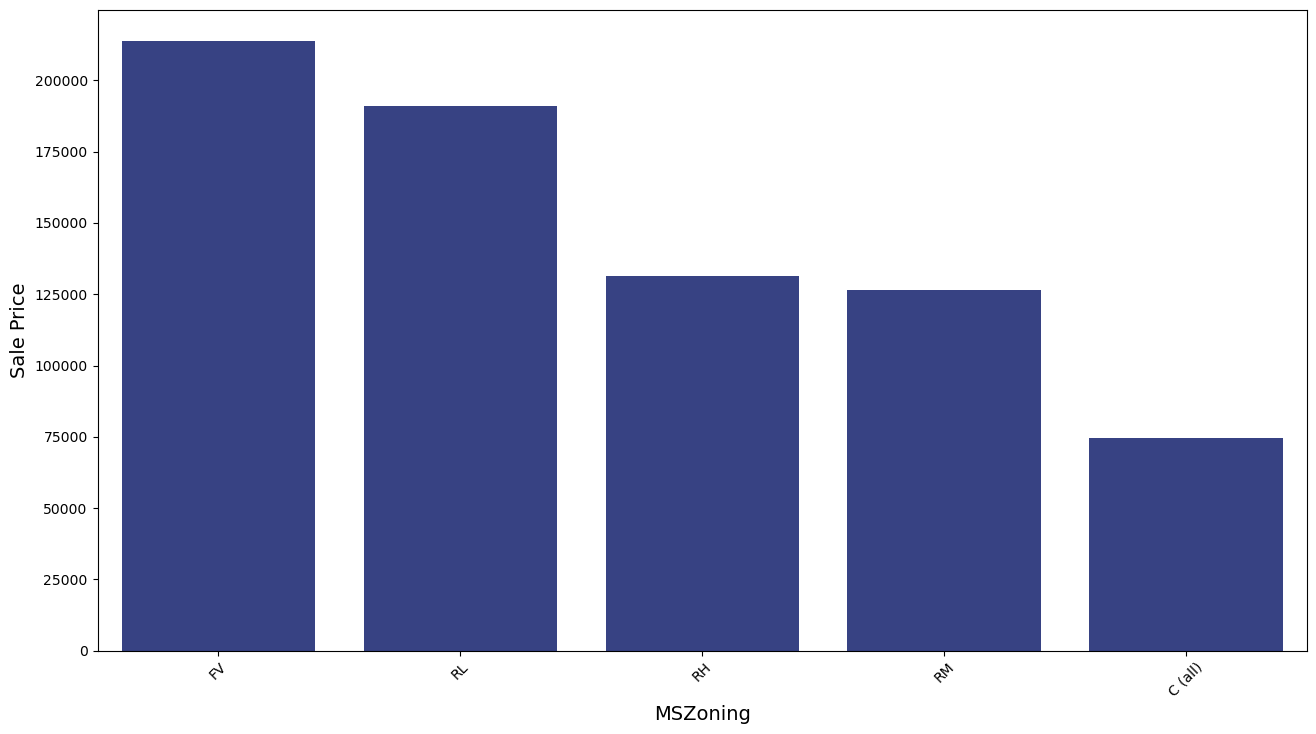

In [127]:
# Plot a bar chart showing the mean sale price per zoning category
plt.figure(figsize=(13.33, 7.5))  # Set the figure size
sns.barplot(data=price_per_zone, x='MSZoning', y='SalePrice', color='#2a3990')  # Create a bar plot with specified color
plt.xlabel('MSZoning')  # Label for the x-axis
plt.ylabel('Sale Price')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to fit labels and elements
save_fig('Price per Zone')  # Save the plot to a file
plt.show()  # Display the plot


In [128]:
# Group the data by 'Neighborhood' and count the occurrences of each 'MSZoning' value within each neighborhood
housing_prices.groupby('Neighborhood')['MSZoning'].value_counts()


Neighborhood  MSZoning
Blmngtn       RL           16
              RM            1
Blueste       RM            2
BrDale        RM           16
BrkSide       RM           30
              RL           28
ClearCr       RL           28
CollgCr       RL          140
              RM           10
Crawfor       RL           46
              RM            3
              RH            2
Edwards       RL           90
              RM            8
              RH            2
Gilbert       RL           79
IDOTRR        RM           28
              C (all)       9
MeadowV       RM           17
Mitchel       RL           44
              RM            5
NAmes         RL          223
              RH            2
NPkVill       RL            9
NWAmes        RL           73
NoRidge       RL           41
NridgHt       RL           76
              RM            1
OldTown       RM           95
              RL           17
              C (all)       1
SWISU         RL           20
              RH 

In [129]:
# Group the data by 'Neighborhood' and calculate the mean 'SalePrice' for each neighborhood
# Reset index and sort the resulting DataFrame by 'SalePrice' in descending order
price_per_neighborhood = housing_prices.groupby('Neighborhood')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)

# Display the resulting DataFrame
price_per_neighborhood


Neighborhood      SalePrice
15      NoRidge  335295.317073
16      NridgHt  316270.623377
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273
21      Somerst  225379.837209
4       ClearCr  212565.428571
6       Crawfor  210624.725490
5       CollgCr  197965.773333
0       Blmngtn  194870.882353
8       Gilbert  192854.506329
14       NWAmes  189050.068493
20      SawyerW  186555.796610
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
18        SWISU  142591.360000
1       Blueste  137500.000000
19       Sawyer  136793.135135
17      OldTown  128225.300885
7       Edwards  128219.700000
3       BrkSide  124834.051724
2        BrDale  104493.750000
9        IDOTRR  100123.783784
10      MeadowV   98576.470588

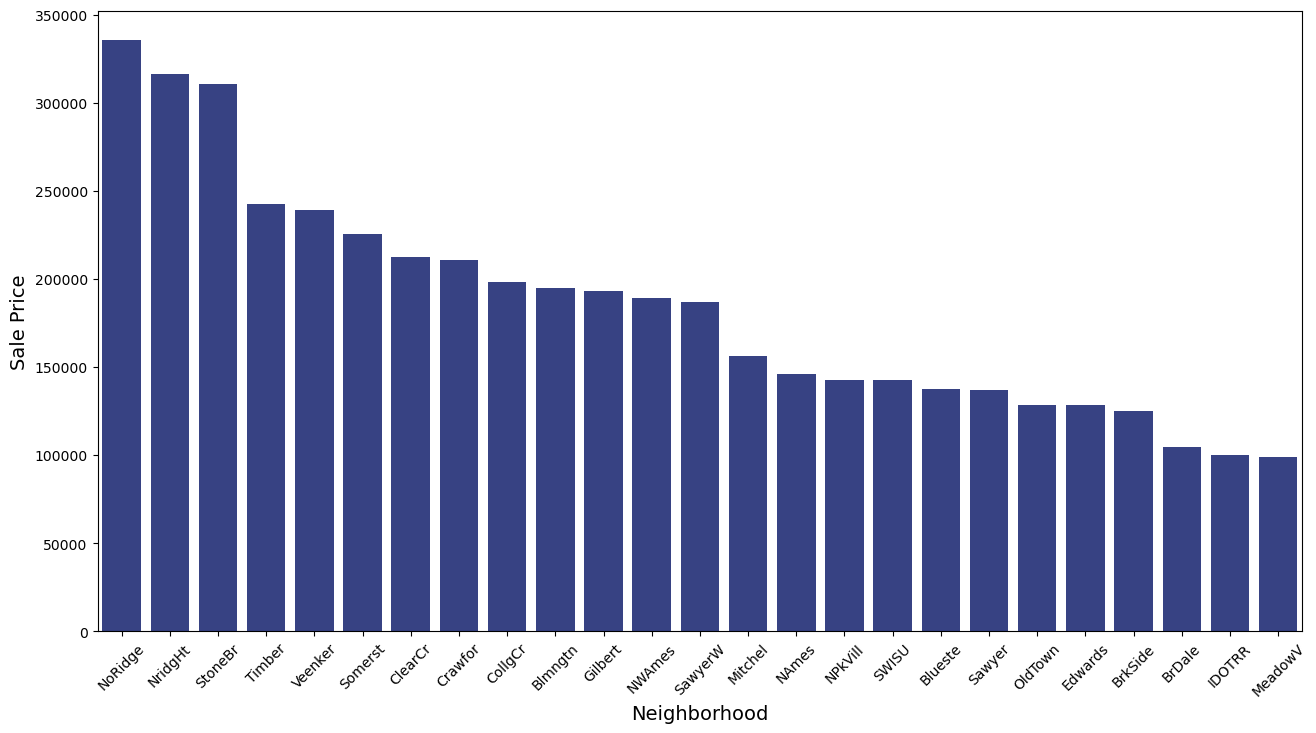

In [130]:
# Plot a bar chart showing the mean sale price per neighborhood
plt.figure(figsize=(13.33, 7.5))  # Set the figure size
sns.barplot(data=price_per_neighborhood, x='Neighborhood', y='SalePrice', color='#2a3990')  # Create a bar plot with specified color
plt.xlabel('Neighborhood')  # Label for the x-axis
plt.ylabel('Sale Price')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to fit labels and elements
save_fig('Price per Neighborhood')  # Save the plot to a file
plt.show()  # Display the plot


In [131]:
# Group the data by 'Neighborhood' and calculate the mean 'LotArea' and 'SalePrice' for each neighborhood
# Reset index and sort the resulting DataFrame by 'SalePrice' in descending order
price_per_neighborhood_lotarea = housing_prices.groupby('Neighborhood').agg({'LotArea': 'mean', 'SalePrice': 'mean'}).reset_index().sort_values(by='SalePrice', ascending=False)

# Display the resulting DataFrame
price_per_neighborhood_lotarea


Neighborhood       LotArea      SalePrice
15      NoRidge  14218.902439  335295.317073
16      NridgHt  10887.948052  316270.623377
22      StoneBr  10671.920000  310499.000000
23       Timber  23664.236842  242247.447368
24      Veenker  15606.000000  238772.727273
21      Somerst   7840.872093  225379.837209
4       ClearCr  30875.750000  212565.428571
6       Crawfor  11809.686275  210624.725490
5       CollgCr   9619.146667  197965.773333
0       Blmngtn   3398.176471  194870.882353
8       Gilbert  11379.151899  192854.506329
14       NWAmes  11833.630137  189050.068493
20      SawyerW   9923.796610  186555.796610
11      Mitchel  11624.285714  156270.122449
12        NAmes  10139.915556  145847.080000
13      NPkVill   3267.444444  142694.444444
18        SWISU   8127.560000  142591.360000
1       Blueste   1625.000000  137500.000000
19       Sawyer  10459.283784  136793.135135
17      OldTown   8207.061947  128225.300885
7       Edwards  10218.650000  128219.700000
3       BrkSide   7360.413793  124834.051724
2        BrDale   1801.000000  104493.750000
9        IDOTRR   8109.162162  100123.783784
10      MeadowV   2324.000000   98576.470588

In [132]:
# Group the data by 'YearBuilt' and calculate the mean 'SalePrice' for each year
# Reset index and sort the resulting DataFrame by 'SalePrice' in descending order
price_per_year_built = housing_prices.groupby('YearBuilt')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)

# Display the resulting DataFrame
price_per_year_built


YearBuilt      SalePrice
111       2010  394432.000000
109       2008  348849.130435
7         1893  325000.000000
6         1892  291250.000000
90        1989  279500.000000
110       2009  269220.000000
96        1995  262194.444444
97        1996  259162.666667
108       2007  255362.734694
107       2006  251775.447761
82        1981  249880.000000
95        1994  247900.000000
102       2001  242630.000000
36        1932  233358.500000
106       2005  229680.953125
104       2003  227408.577778
103       2002  226869.565217
91        1990  220881.666667
37        1934  220766.666667
99        1998  220450.000000
93        1992  218384.615385
94        1993  218058.823529
98        1997  214925.000000
87        1986  212000.000000
101       2000  210766.666667
100       1999  210614.720000
105       2004  210347.722222
89        1988  204636.363636
2         1880  200619.750000
88        1987  198000.000000
86        1985  191400.000000
92        1991  186140.000000
13        1908  183500.000000
75        1974  183050.000000
84        1983  181400.000000
22        1918  172421.428571
3         1882  168000.000000
78        1977  166860.937500
69        1968  166075.000000
81        1980  164800.000000
85        1984  164111.111111
77        1976  163831.969697
11        1905  163000.000000
45        1942  162000.000000
65        1964  161893.333333
61        1960  161550.000000
38        1935  161083.333333
79        1978  160962.500000
70        1969  160725.642857
67        1966  159559.444444
27        1923  159428.571429
76        1975  159268.750000
10        1904  157500.000000
80        1979  156396.888889
23        1919  154833.333333
60        1959  154124.307692
66        1965  153115.958333
33        1929  153000.000000
42        1939  150825.000000
58        1957  149959.100000
54        1953  146333.333333
63        1962  145742.105263
64        1963  143403.125000
59        1958  143179.166667
68        1967  142337.500000
5         1890  142200.000000
25        1921  140813.333333
73        1972  140569.565217
62        1961  139846.428571
20        1916  139800.000000
55        1954  139650.000000
74        1973  139400.000000
39        1936  137888.888889
49        1948  137764.285714
52        1951  136600.000000
57        1956  135810.714286
32        1928  135557.142857
12        1906  135000.000000
71        1970  134647.916667
56        1955  134517.187500
19        1915  134387.500000
46        1945  133500.000000
83        1982  132400.000000
43        1940  131994.444444
40        1937  131974.200000
72        1971  131820.454545
15        1911  130000.000000
21        1917  129500.000000
29        1925  129190.625000
51        1950  128036.250000
35        1931  126650.000000
18        1914  126055.285714
30        1926  124144.444444
47        1946  122400.000000
0         1872  122000.000000
44        1941  120900.000000
16        1912  119466.666667
48        1947  117200.000000
24        1920  112903.333333
9         1900  112492.600000
14        1910  111959.058824
50        1949  111517.583333
4         1885  111250.000000
53        1952  110398.600000
26        1922  109237.500000
41        1938  109137.500000
8         1898  106000.000000
28        1924  105985.714286
34        1930  103588.888889
1         1875   94000.000000
17        1913   90350.000000
31        1927   82666.666667

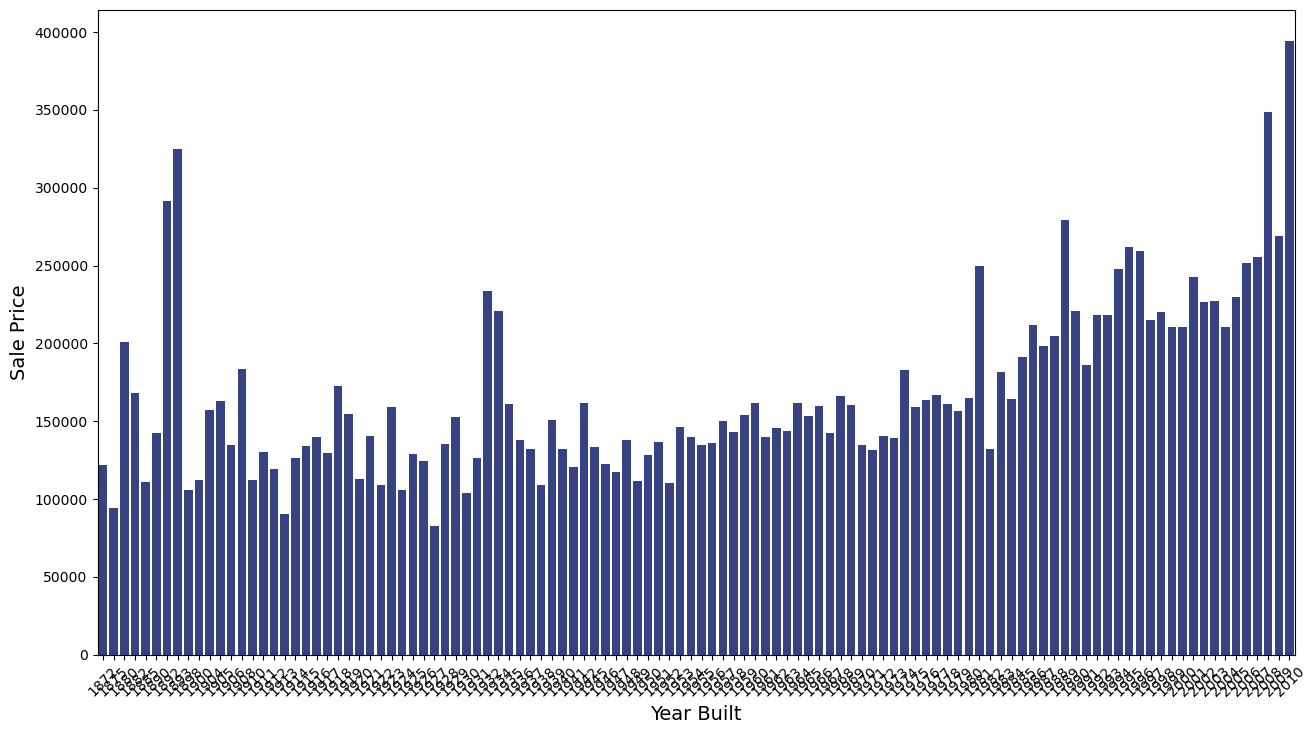

In [133]:
# Sort the DataFrame by 'YearBuilt' in ascending order for plotting
price_year_plot = price_per_year_built.sort_values(by='YearBuilt', ascending=True)

# Plot a bar chart showing the mean sale price per year of construction
plt.figure(figsize=(13.33, 7.5))  # Set the figure size
sns.barplot(data=price_year_plot, x='YearBuilt', y='SalePrice', color='#2a3990')  # Create a bar plot with specified color
plt.xlabel('Year Built')  # Label for the x-axis
plt.ylabel('Sale Price')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to fit labels and elements
save_fig('Price per Year plot')  # Save the plot to a file
plt.show()  # Display the plot


In [134]:
# Group the data by 'OverallQual' and calculate the mean 'SalePrice' for each quality rating
# Reset index and sort the resulting DataFrame by 'SalePrice' in descending order
price_per_qual = housing_prices.groupby('OverallQual')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)

# Display the resulting DataFrame
price_per_qual


OverallQual      SalePrice
9           10  438588.388889
8            9  367513.023256
7            8  274735.535714
6            7  207716.423197
5            6  161603.034759
4            5  133523.347607
3            4  108420.655172
2            3   87473.750000
1            2   51770.333333
0            1   50150.000000

In [135]:
# Group the data by 'LandSlope' and calculate the mean 'SalePrice' for each slope category
# Reset index and sort the resulting DataFrame by 'SalePrice' in descending order
price_per_slope = housing_prices.groupby('LandSlope')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)

# Display the resulting DataFrame
price_per_slope


LandSlope      SalePrice
2       Sev  204379.230769
1       Mod  196734.138462
0       Gtl  179956.799566

In [136]:
# Group the data by 'Utilities' and calculate the mean 'SalePrice' for each utilities category
# Reset index and sort the resulting DataFrame by 'SalePrice' in descending order
price_per_num_utilities = housing_prices.groupby('Utilities')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)

# Display the resulting DataFrame
price_per_num_utilities


Utilities     SalePrice
0    AllPub  180950.95682
1    NoSeWa  137500.00000

### VISUALIZING MY DATA

#### 1. Box plots

<Figure size 1500x1000 with 0 Axes>

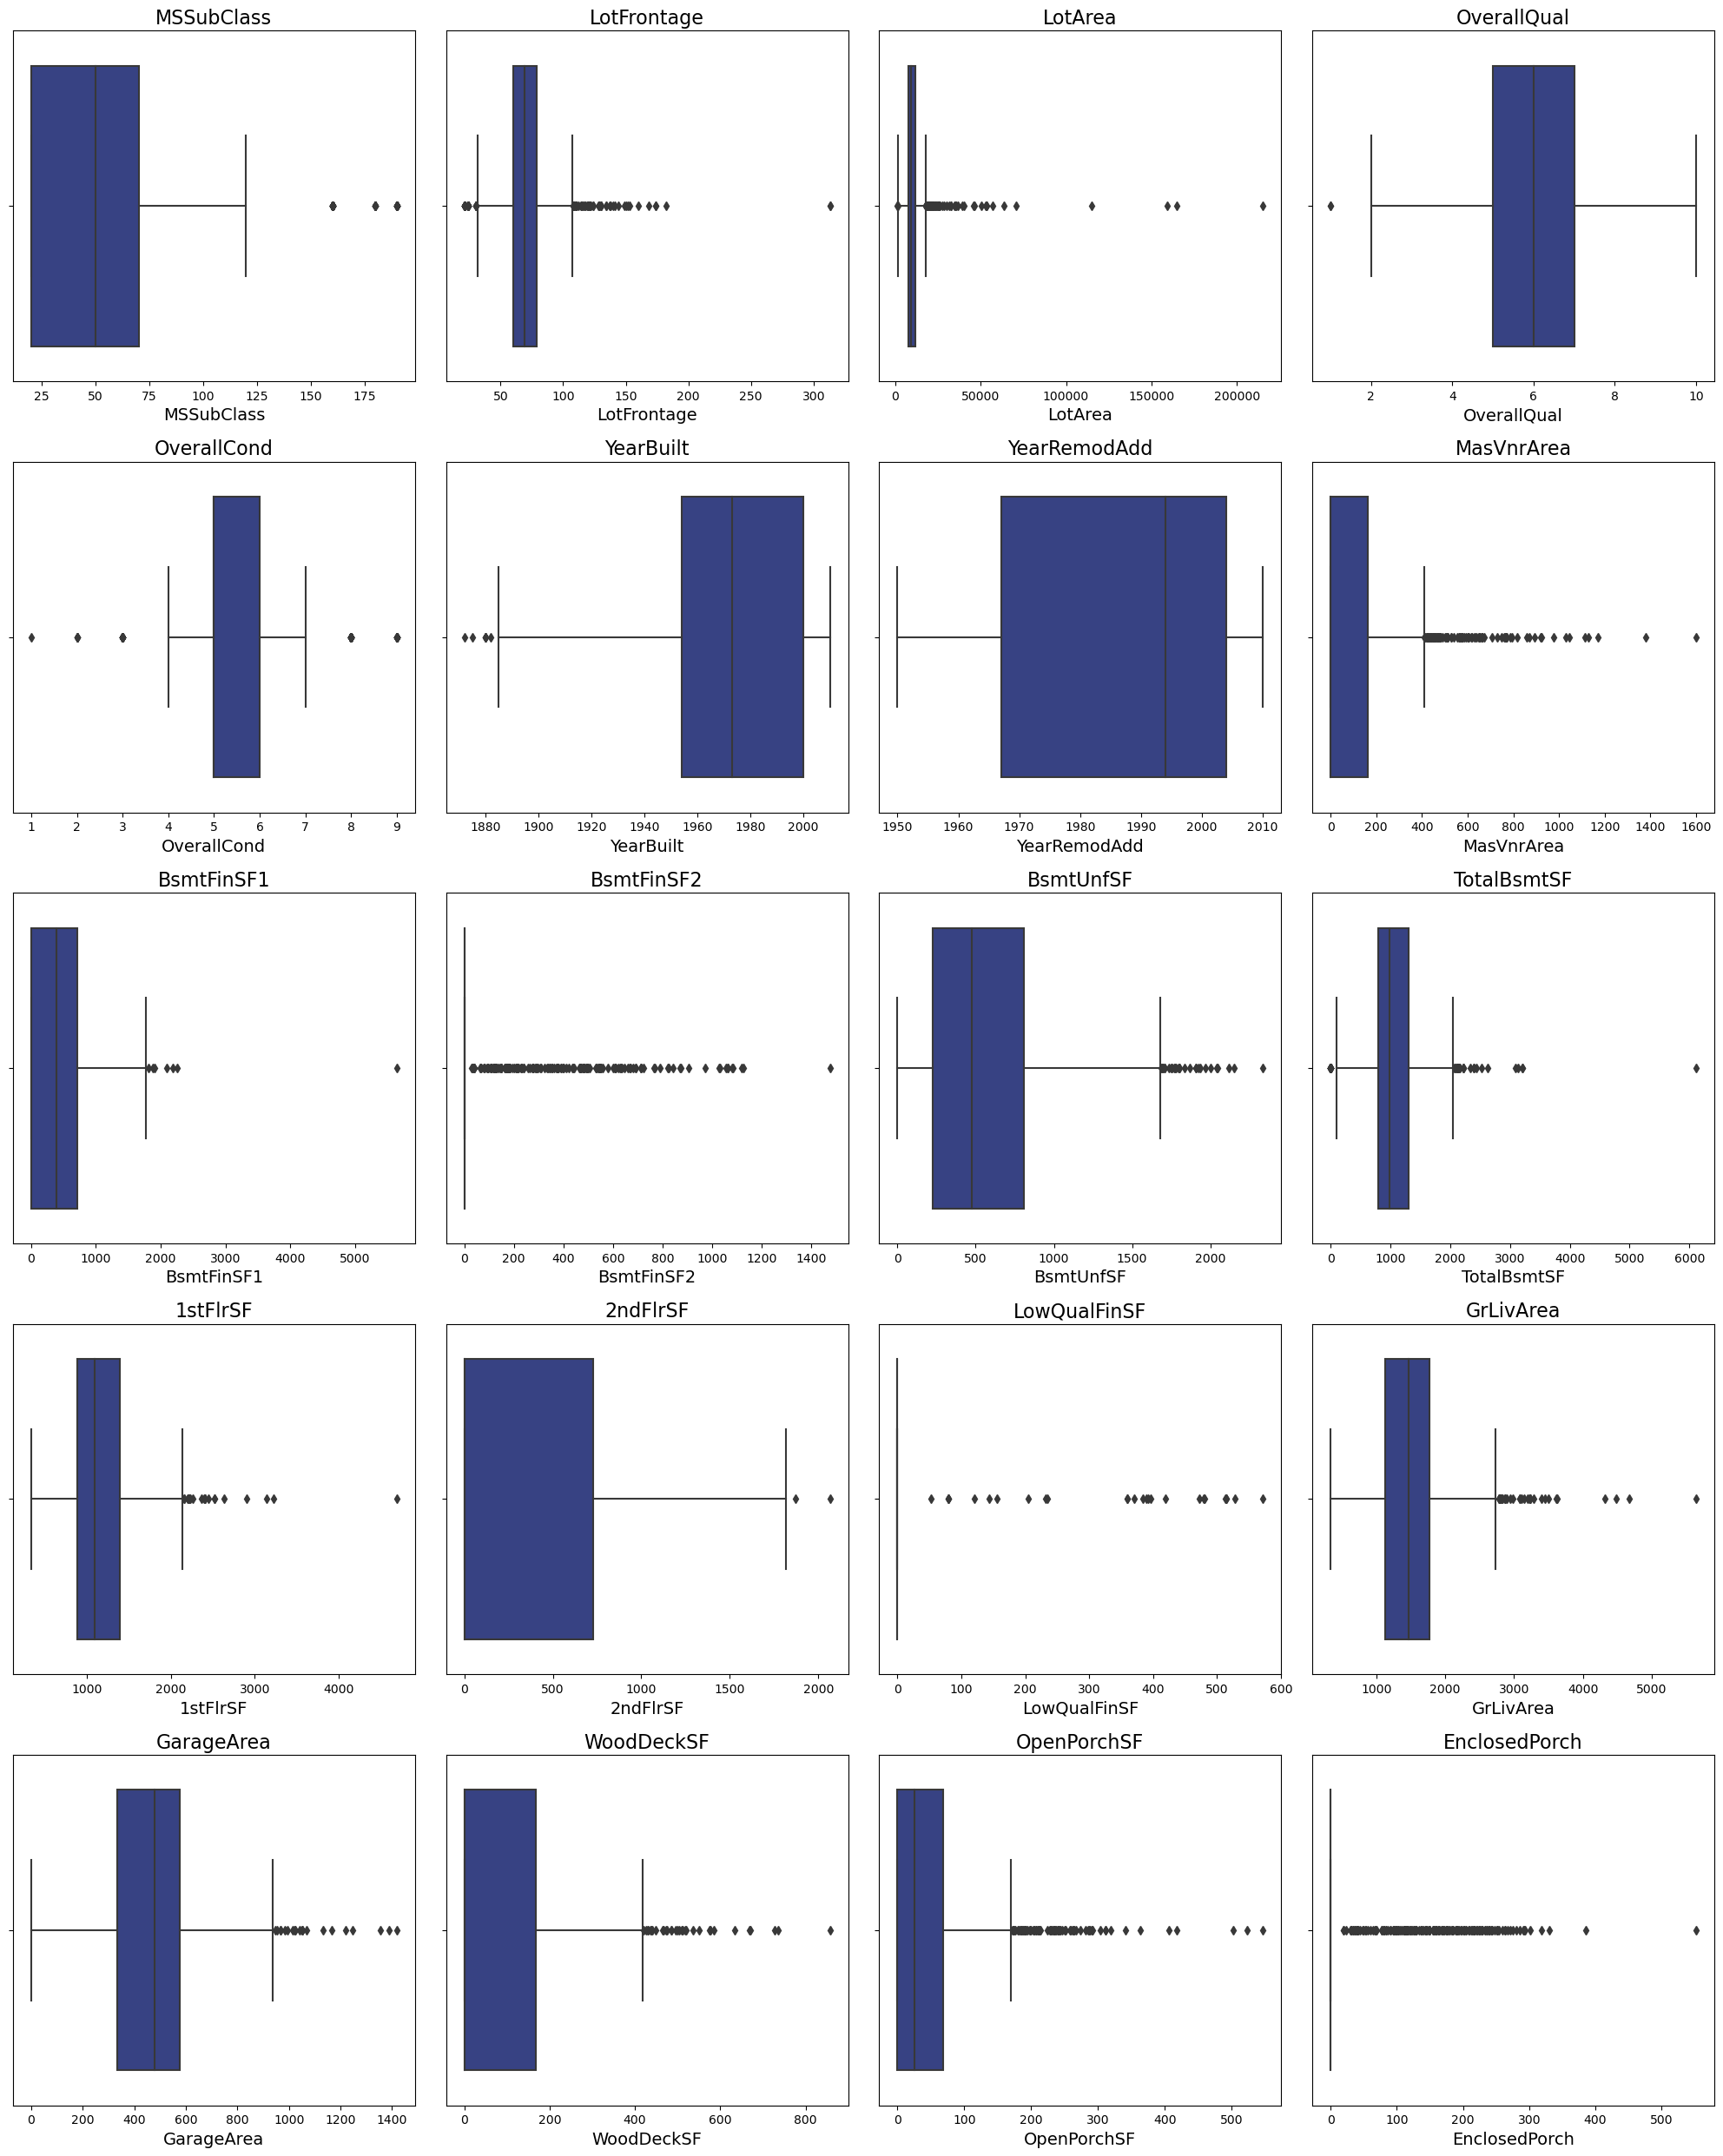

In [137]:
# Set the figure size larger for better readability
plt.figure(figsize=(15, 10))

numerical_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=housing_prices, x=column, ax=axes[i], color='#2a3990')
    axes[i].set_title(column, fontsize=16)

plt.tight_layout(pad=3)
save_fig('Boxplots of Numerical Columns 1')
plt.show()

<Figure size 1500x1000 with 0 Axes>

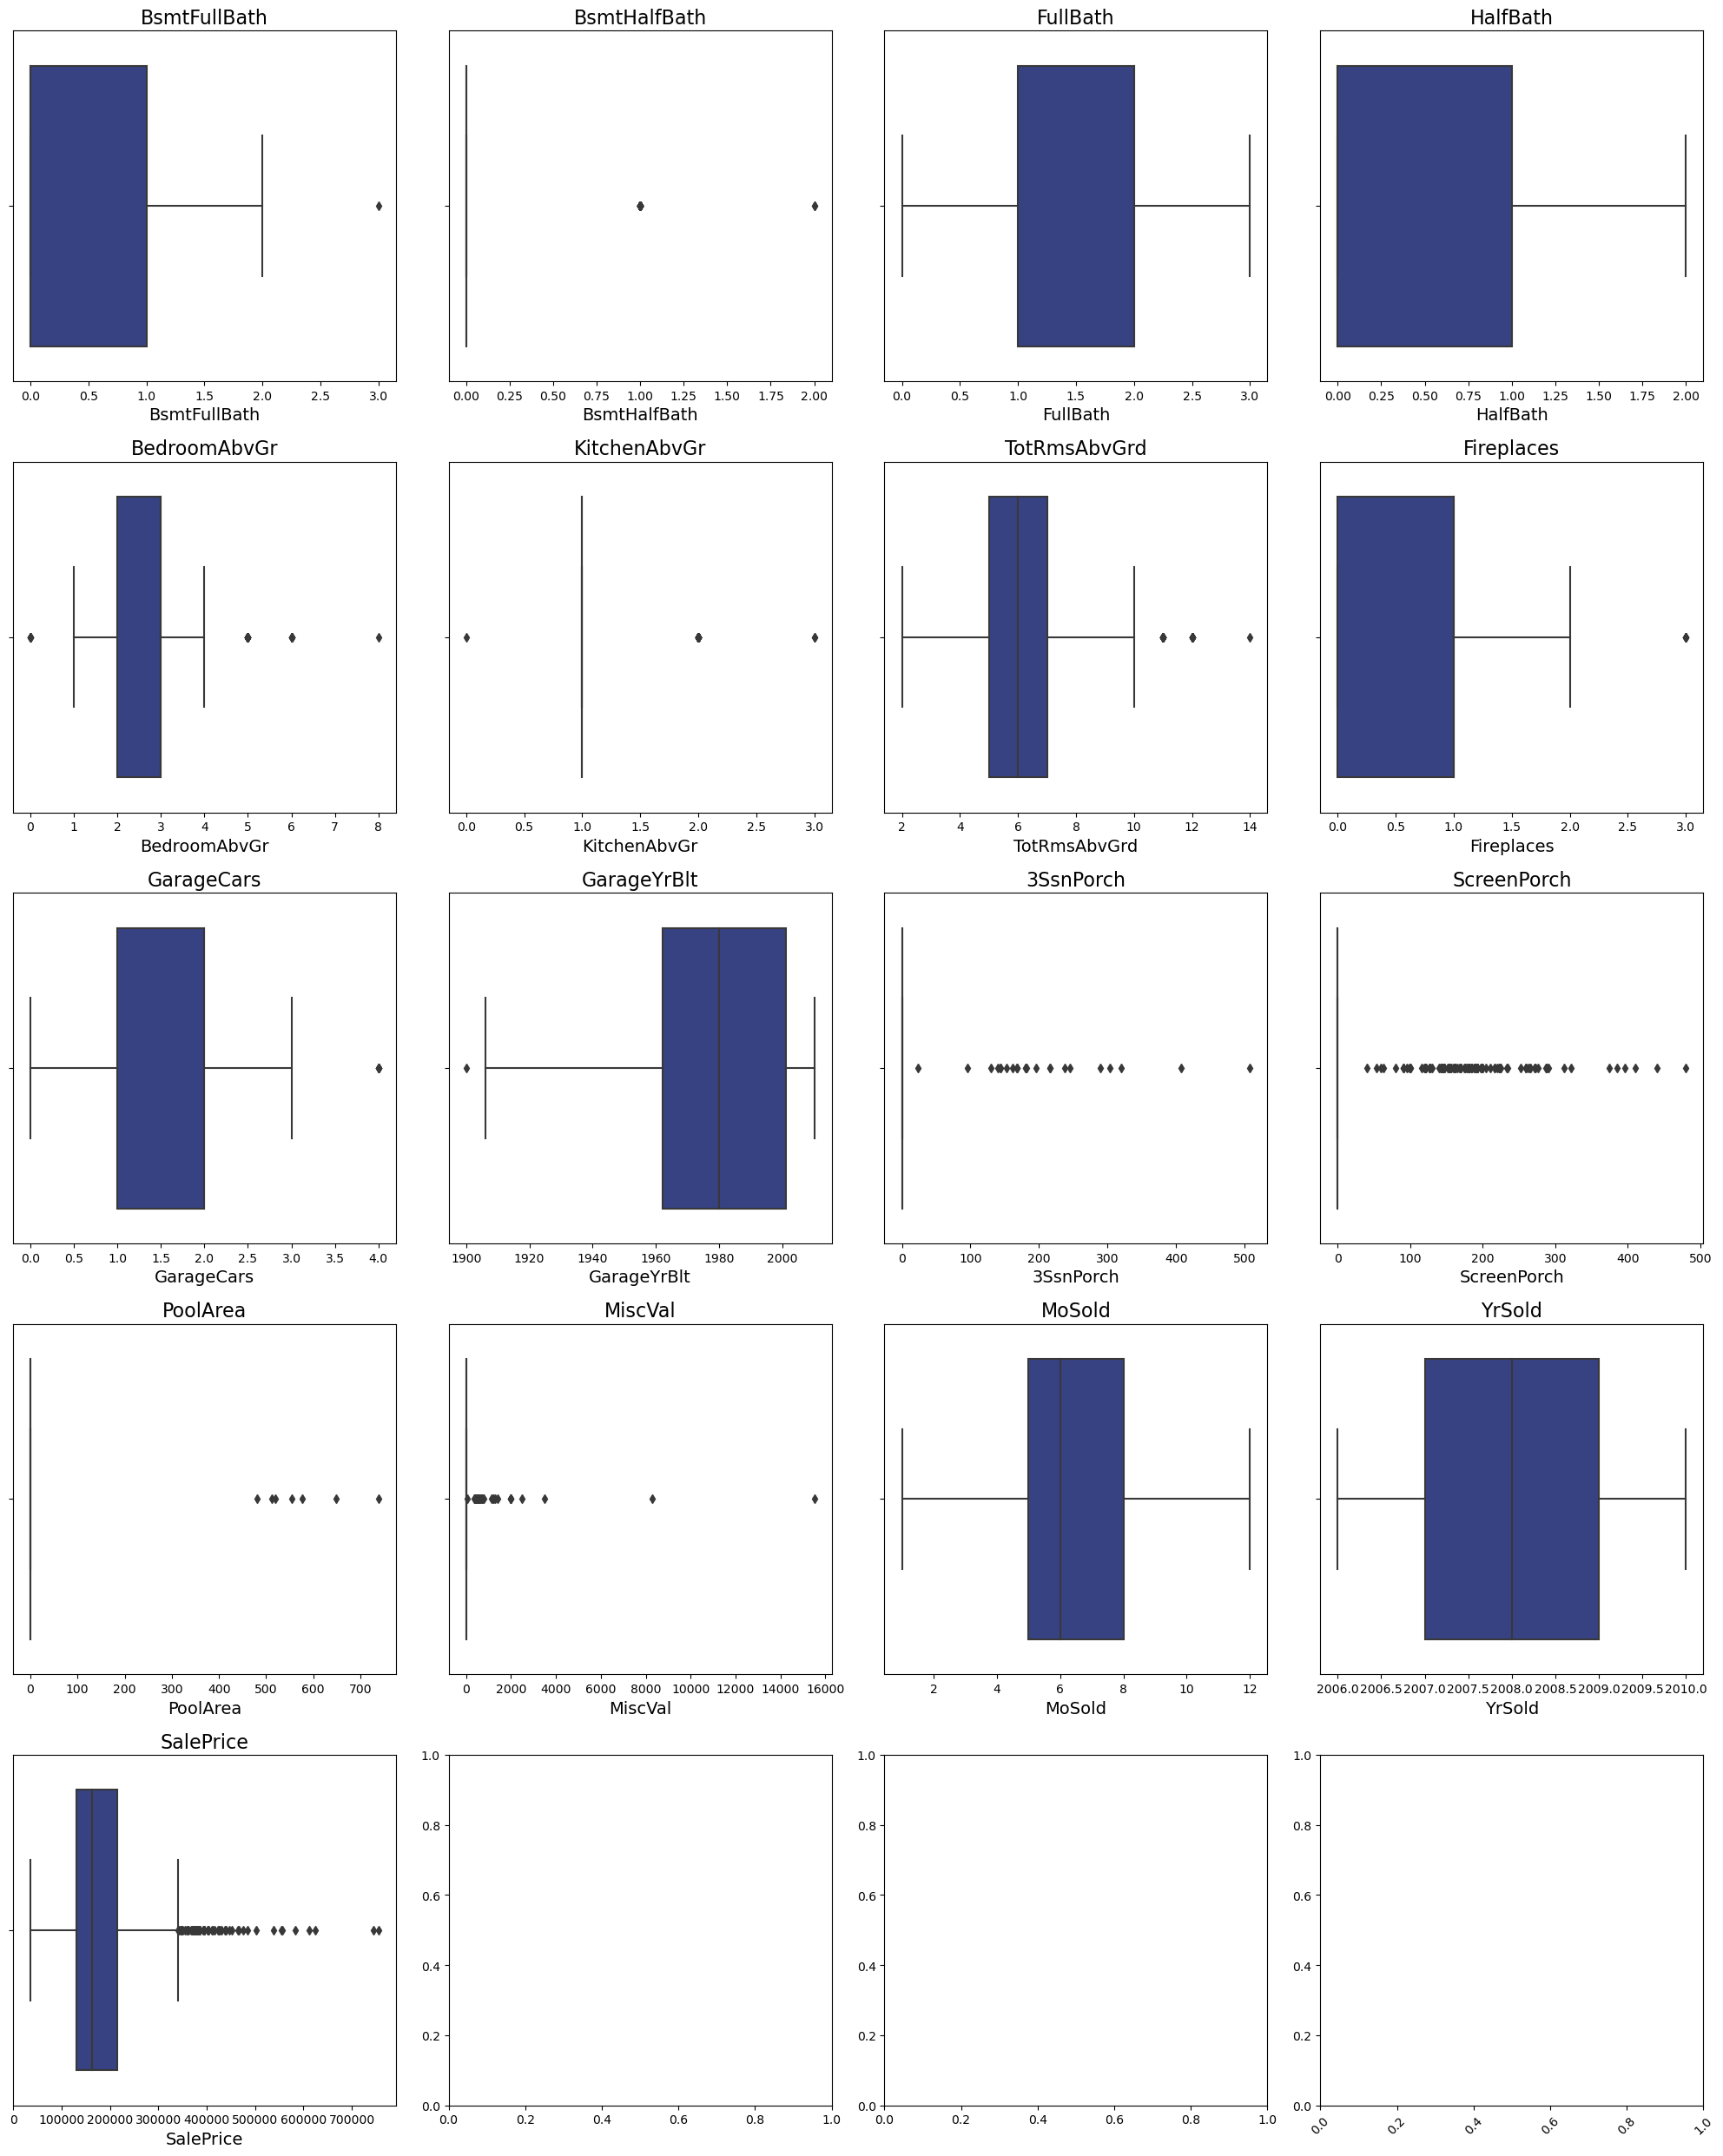

In [138]:
# Set the figure size larger for better readability
plt.figure(figsize=(15, 10))

numerical_columns1 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageYrBlt', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

for i, column in enumerate(numerical_columns1):
    sns.boxplot(data=housing_prices, x=column, ax=axes[i], color='#2a3990')
    axes[i].set_title(column, fontsize=16)
    
plt.xticks(rotation=45)
plt.tight_layout(pad=3)
save_fig('Boxplots of Numerical Columns 2')
plt.show()

### 2. Histogram Plot

<Figure size 1500x2000 with 0 Axes>

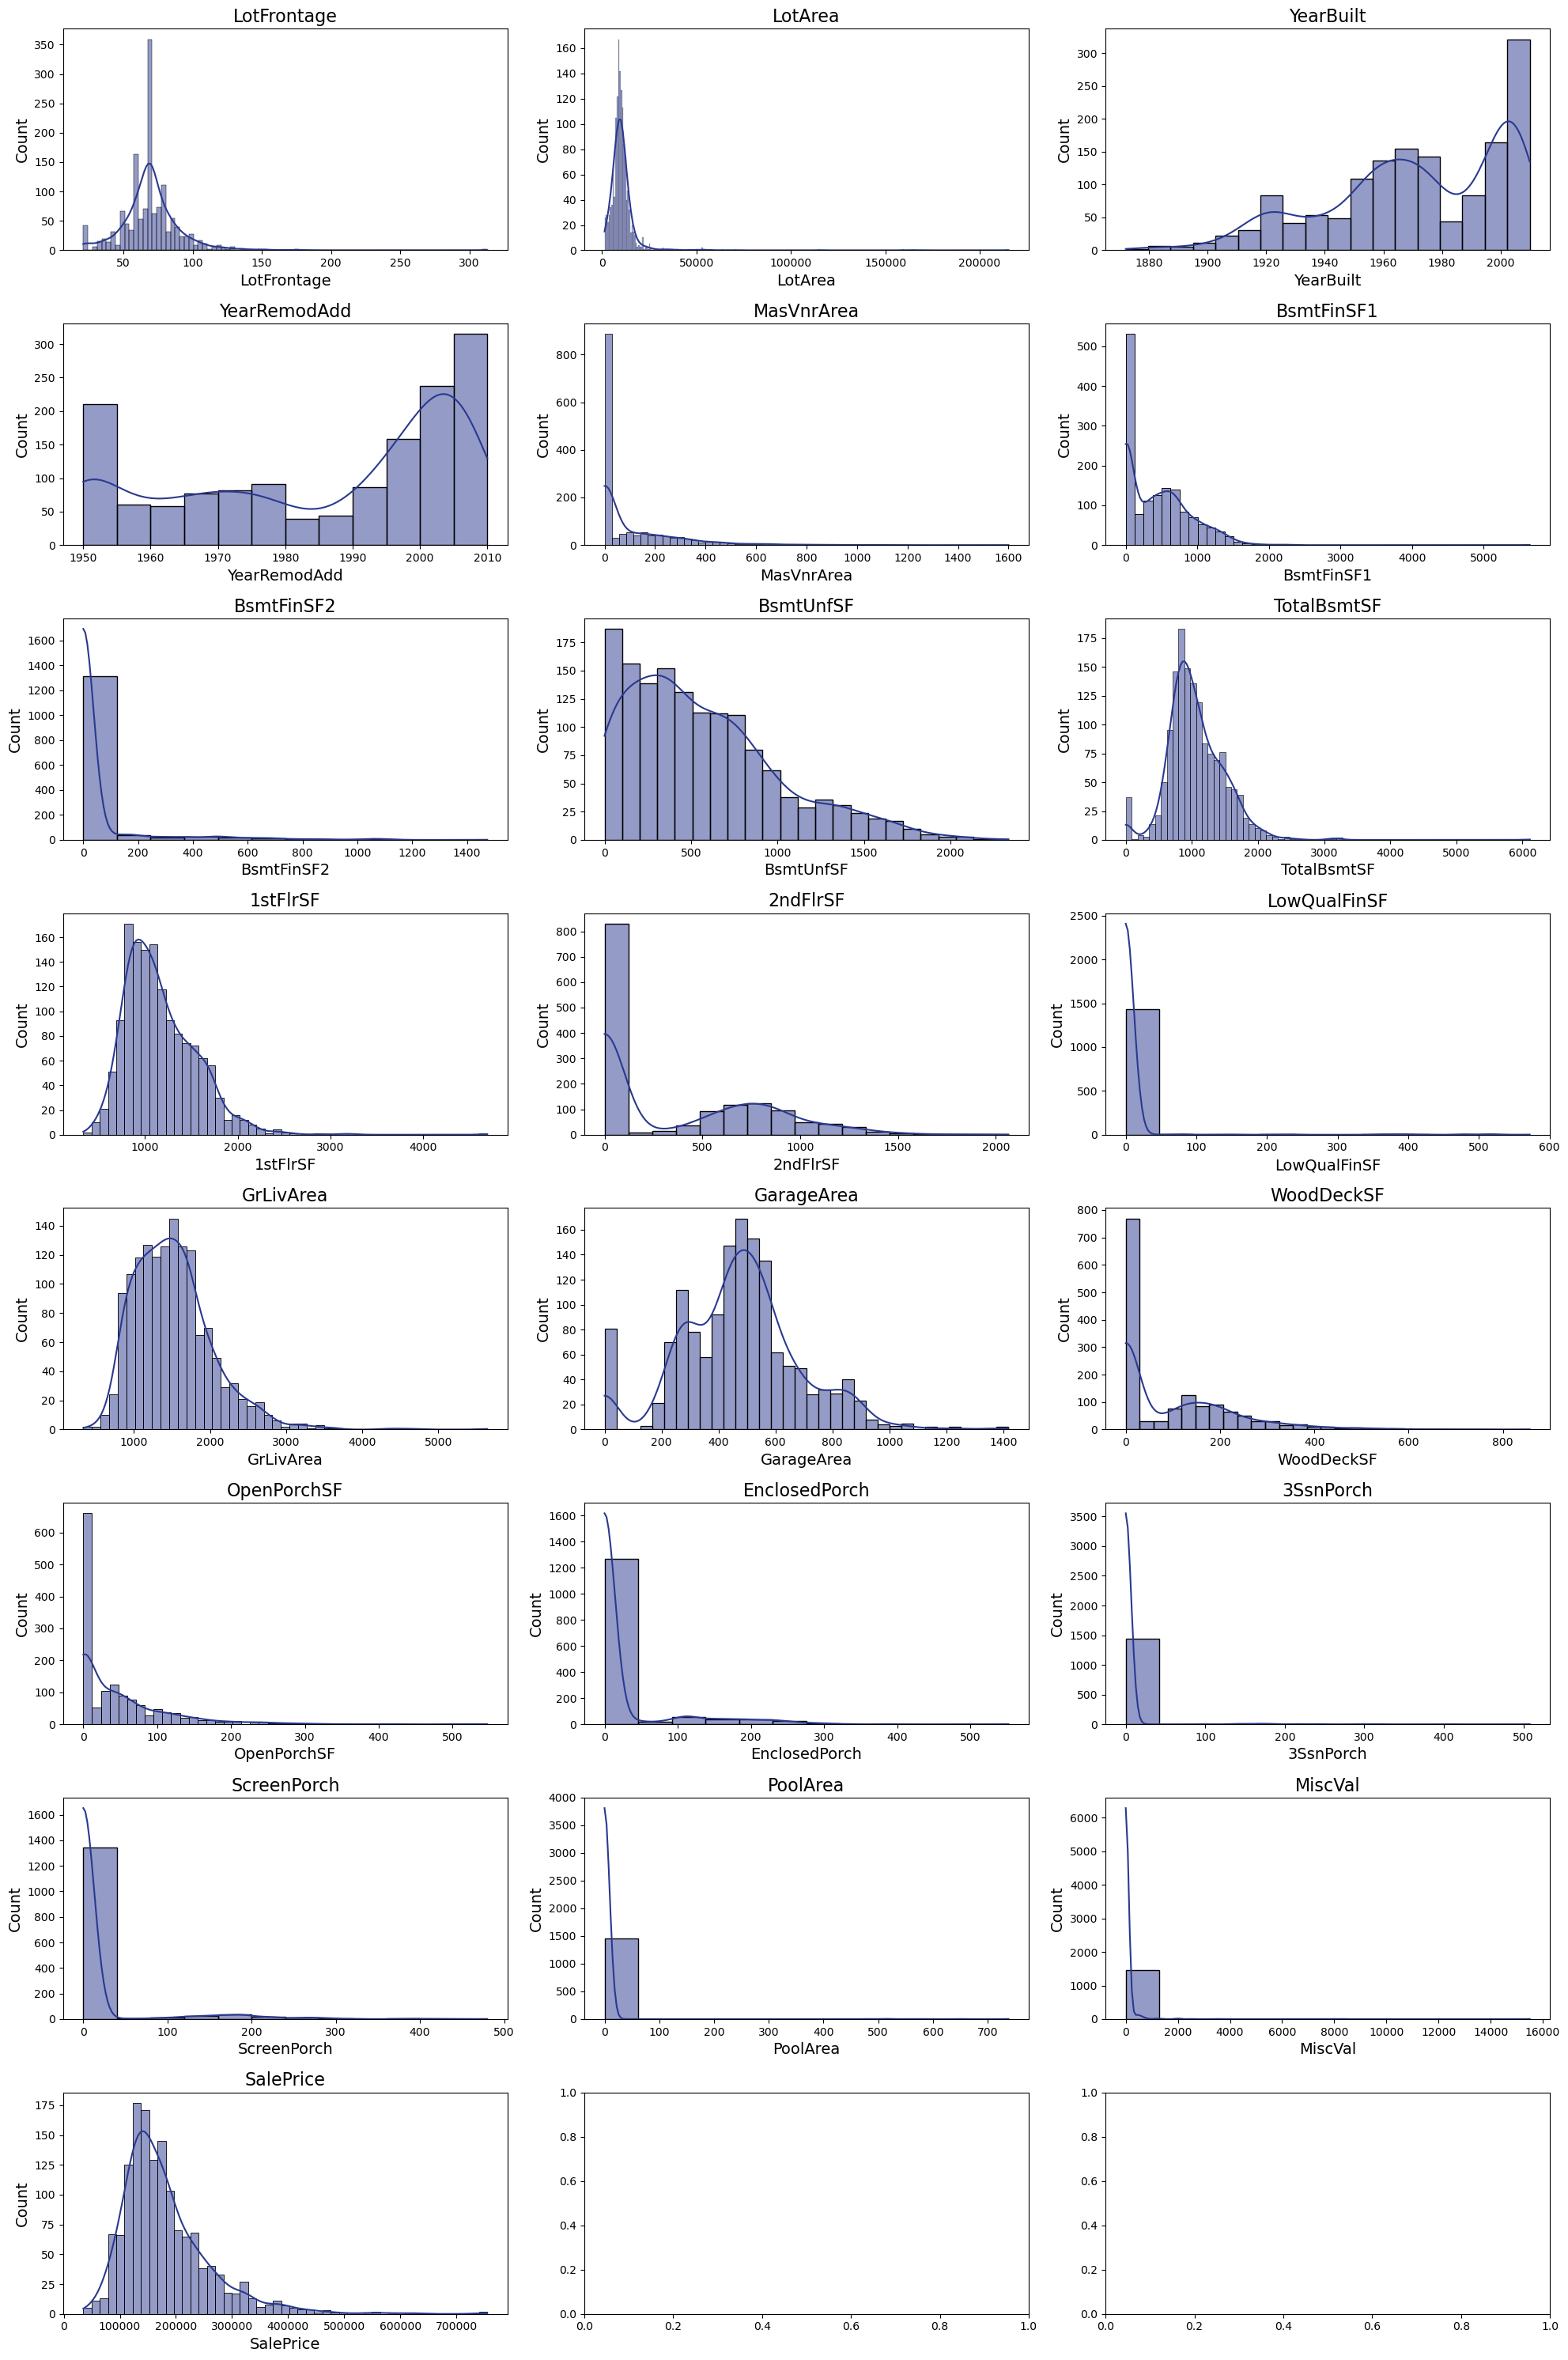

In [139]:
# List of numerical columns for histogram plotting
hist_columns = [
    'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'MiscVal', 'SalePrice'
]

# Set the figure size larger for better readability
plt.figure(figsize=(15, 20))

# Create subplots
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))
axes = axes.flatten()

# Loop through each column and create a histogram
for i, column in enumerate(hist_columns):
    if i < len(hist_columns):  # Check to avoid IndexError if columns are less than 24
        sns.histplot(data=housing_prices, x=column, kde=True, ax=axes[i], color='#2a3990')
        axes[i].set_title(column, fontsize=16)

# Adjust layout to avoid overlapping
plt.tight_layout(pad=3.0)
save_fig('Hist plots of Numerical Columns 1')
plt.show()


'GarageYrBlt', 'MiscVal', 'ScreenPorch', '3SsnPorch',
    'EnclosedPorch', 'PoolArea'

<Figure size 2000x1500 with 0 Axes>

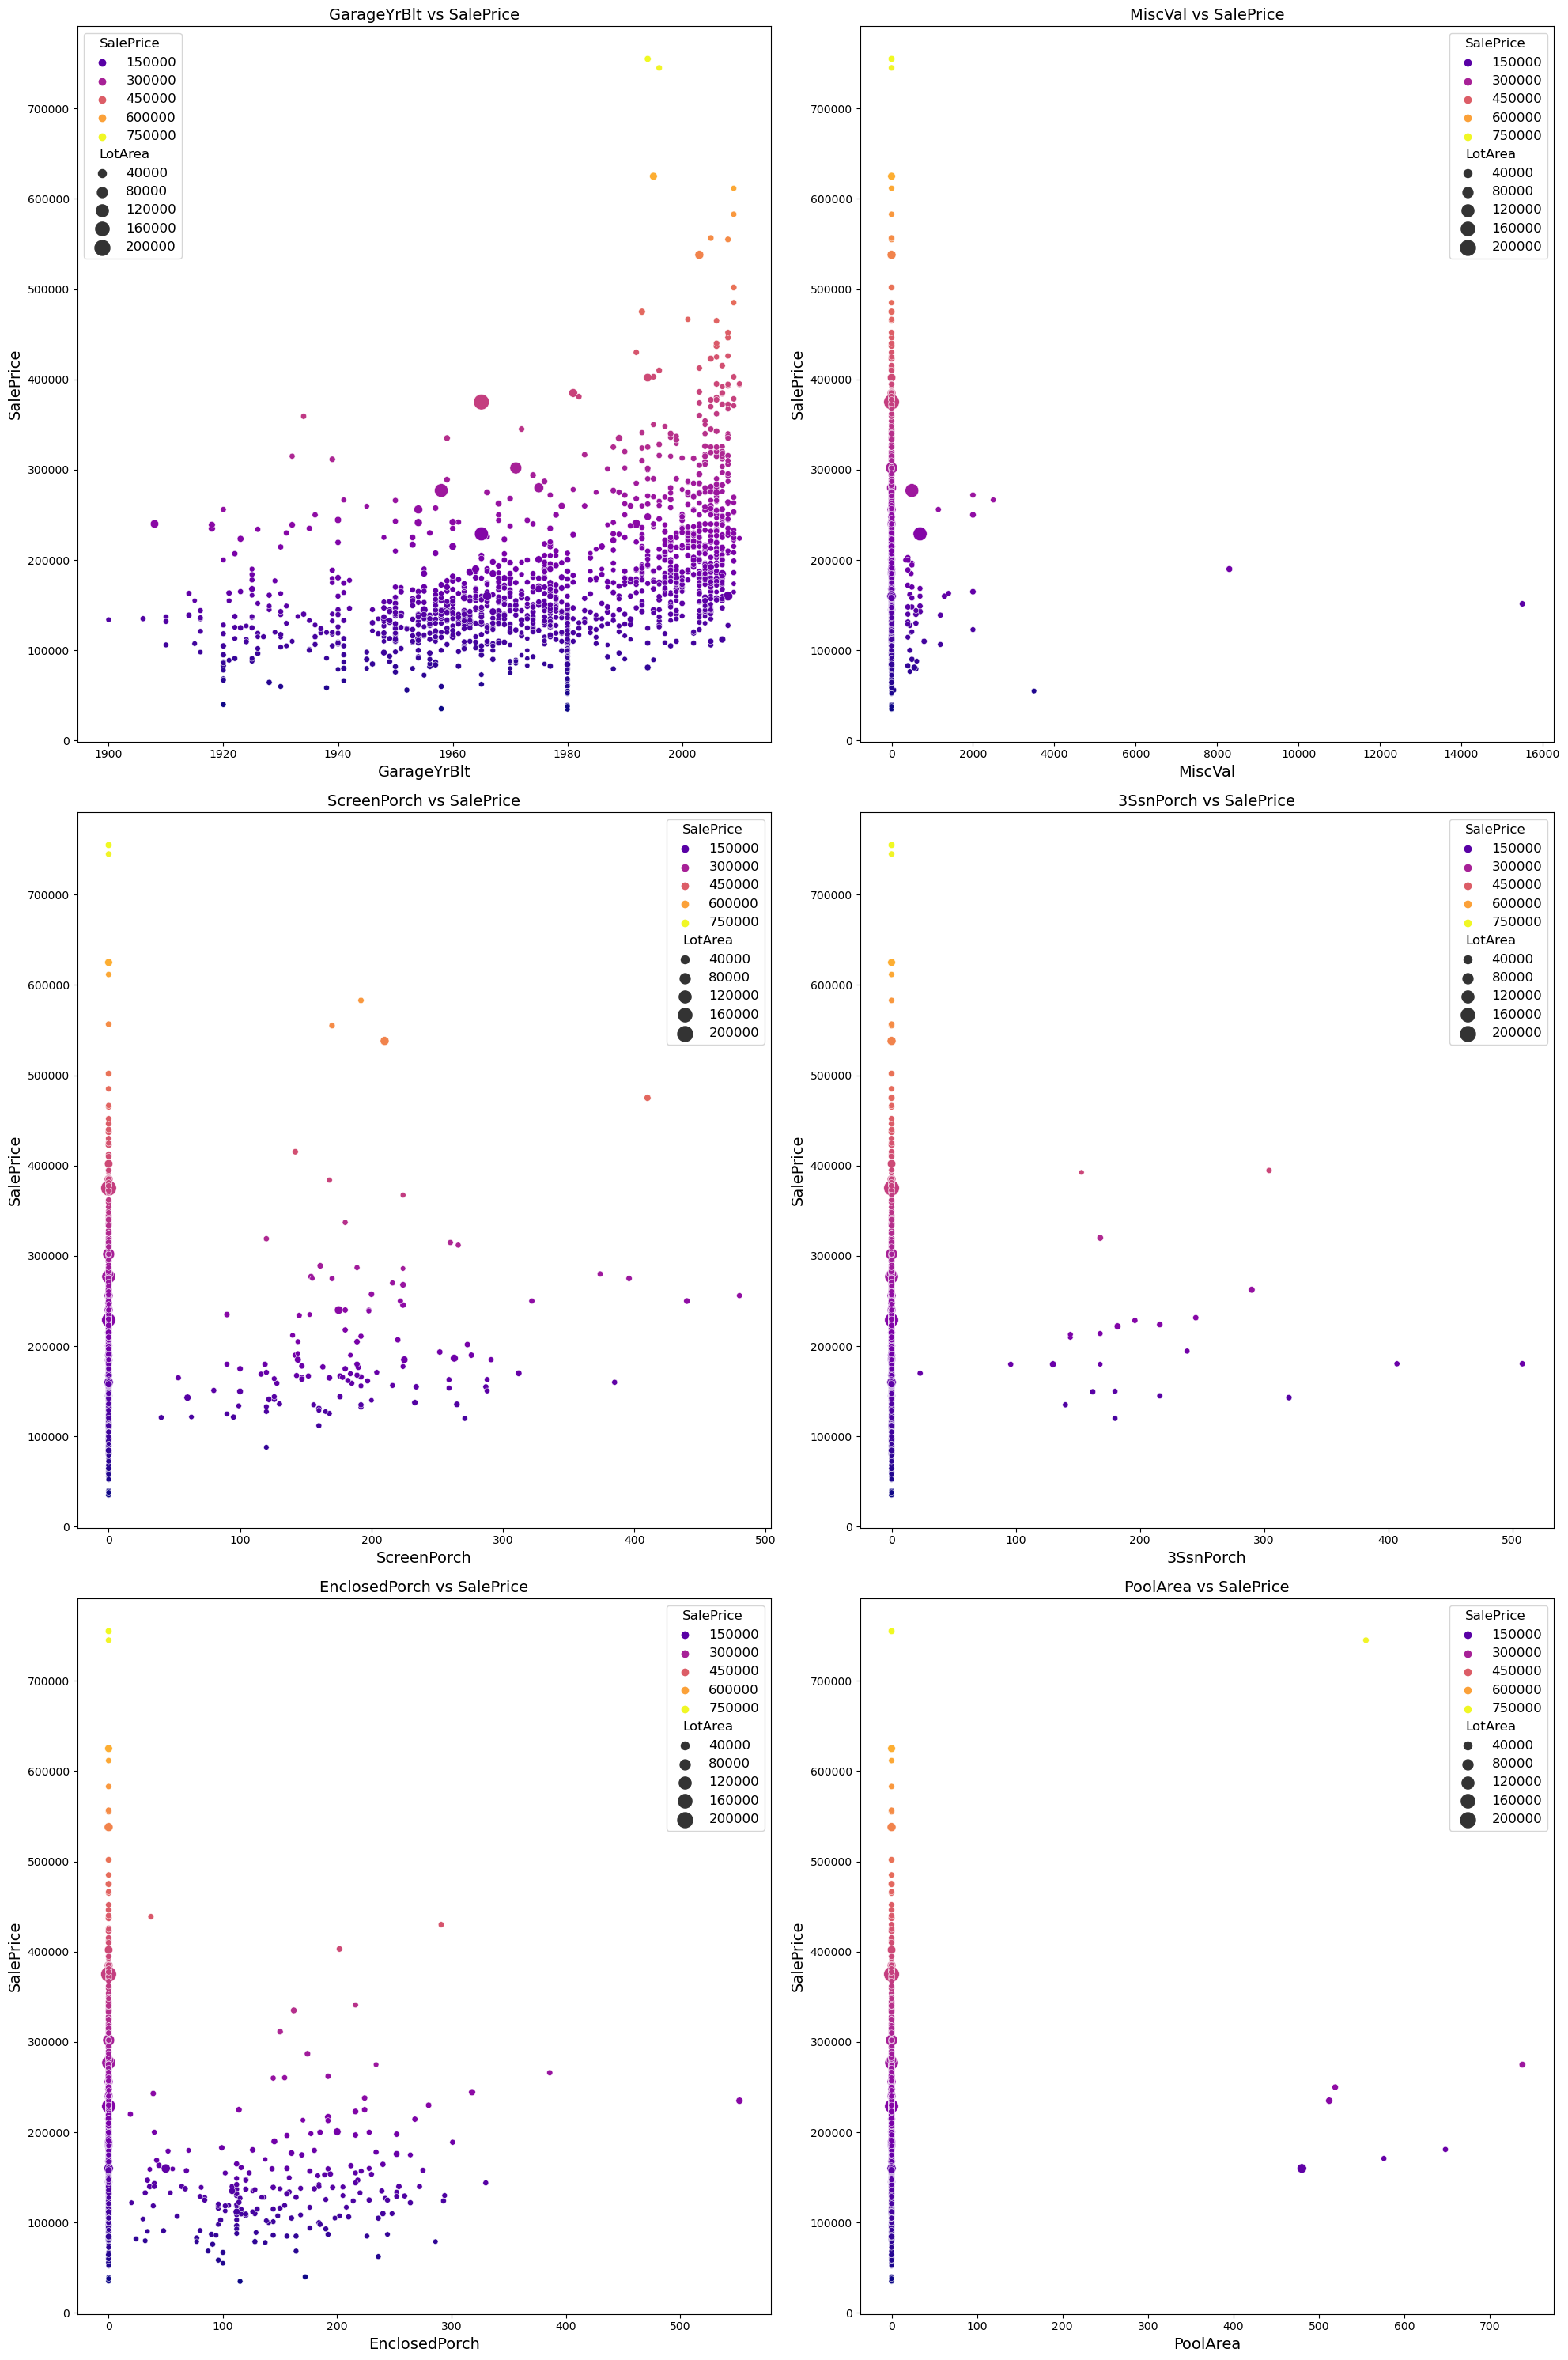

In [140]:
# Define the columns for the x-axis
x_columns = ['GarageYrBlt', 'MiscVal', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'PoolArea']

# Set the figure size for better readability 
plt.figure(figsize=(20, 15))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))
axes = axes.flatten()

# Loop through each x_column and create a scatter plot
for i, x_col in enumerate(x_columns):
    sns.scatterplot(data=housing_prices, x=x_col, y='SalePrice', size='LotArea', hue='SalePrice', palette='plasma', sizes=(20, 200), ax=axes[i])
    axes[i].set_title(f'{x_col} vs SalePrice', fontsize=14)

# Adjust layout to avoid overlapping
plt.tight_layout(pad=3.0)
save_fig('Scatterplot of Numerical Columns against Sale price 1')
plt.show()

<Figure size 2000x1500 with 0 Axes>

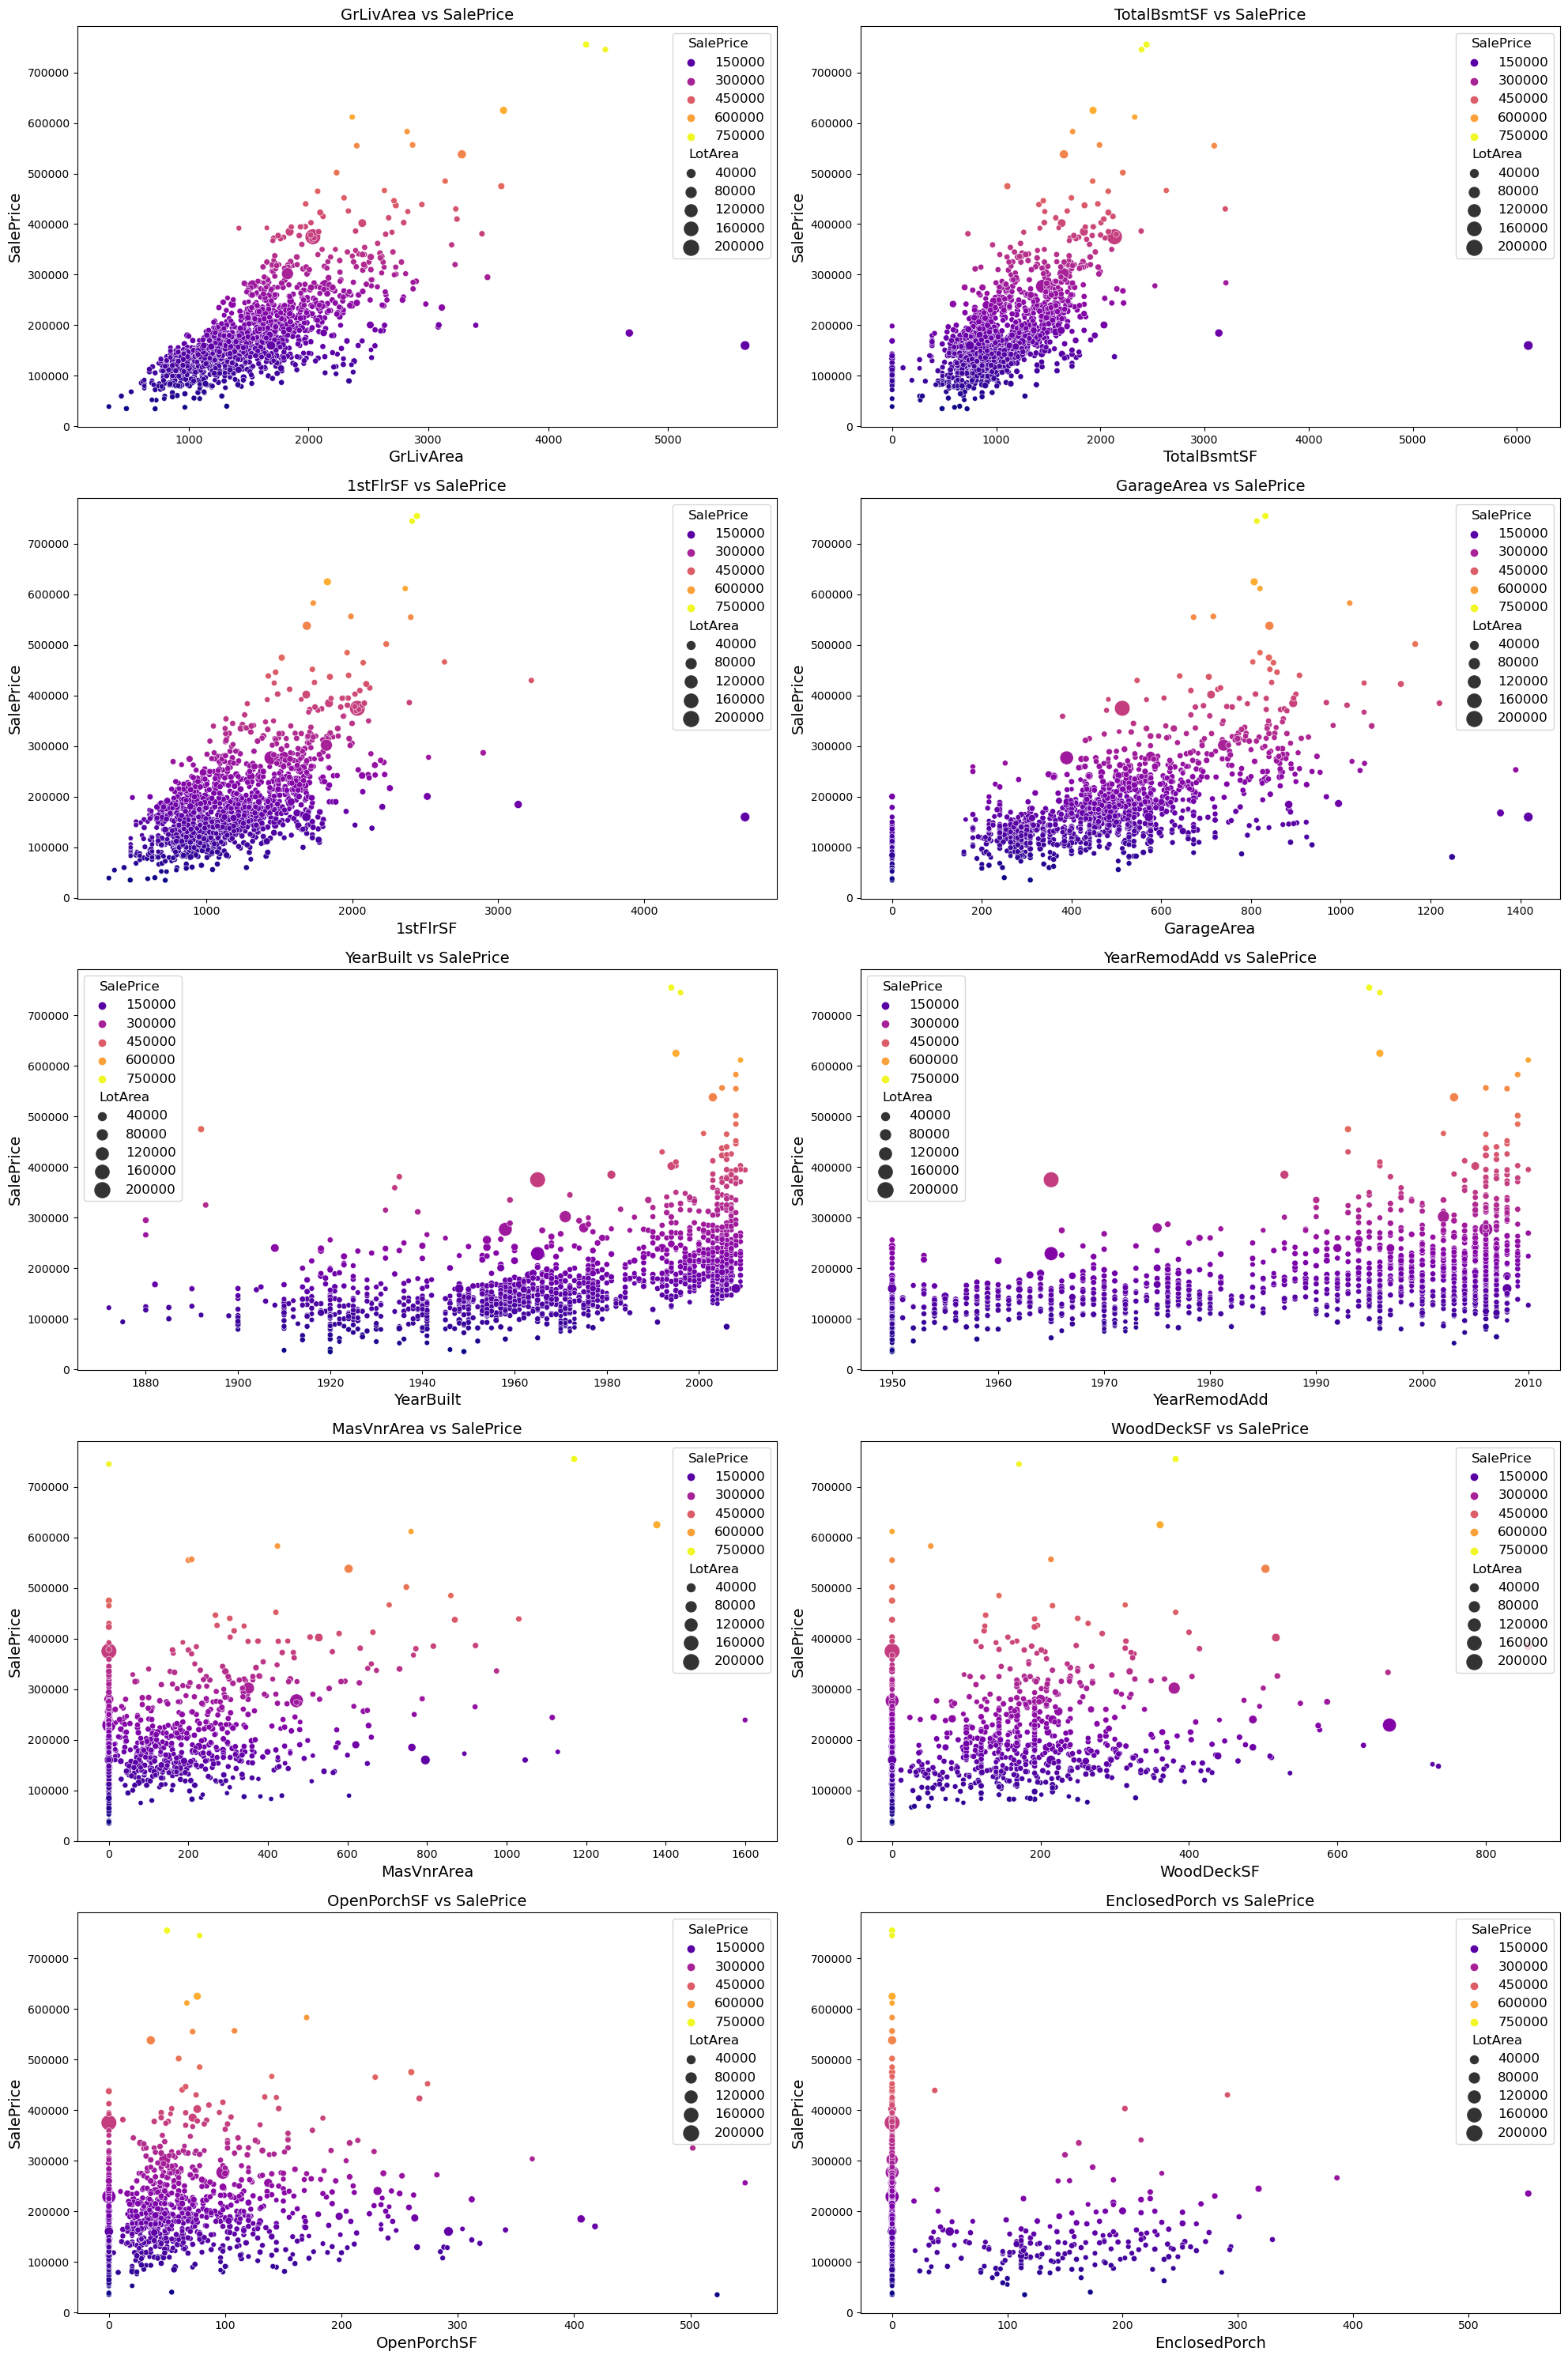

In [141]:
# Define the columns for the x-axis
x_columns1 = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt','YearRemodAdd', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

# Set the figure size for better readability 
plt.figure(figsize=(20, 15))

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
axes = axes.flatten()

# Loop through each x_column and create a scatter plot
for i, x_col in enumerate(x_columns1):
    sns.scatterplot(data=housing_prices, x=x_col, y='SalePrice', size='LotArea', hue='SalePrice', palette='plasma', sizes=(20, 200), ax=axes[i])
    axes[i].set_title(f'{x_col} vs SalePrice', fontsize=14)

# Adjust layout to avoid overlapping
plt.tight_layout(pad=3.0)
save_fig('Scatterplot of Numerical Columns against Sale Price 2')
plt.show()

<Figure size 2000x1500 with 0 Axes>

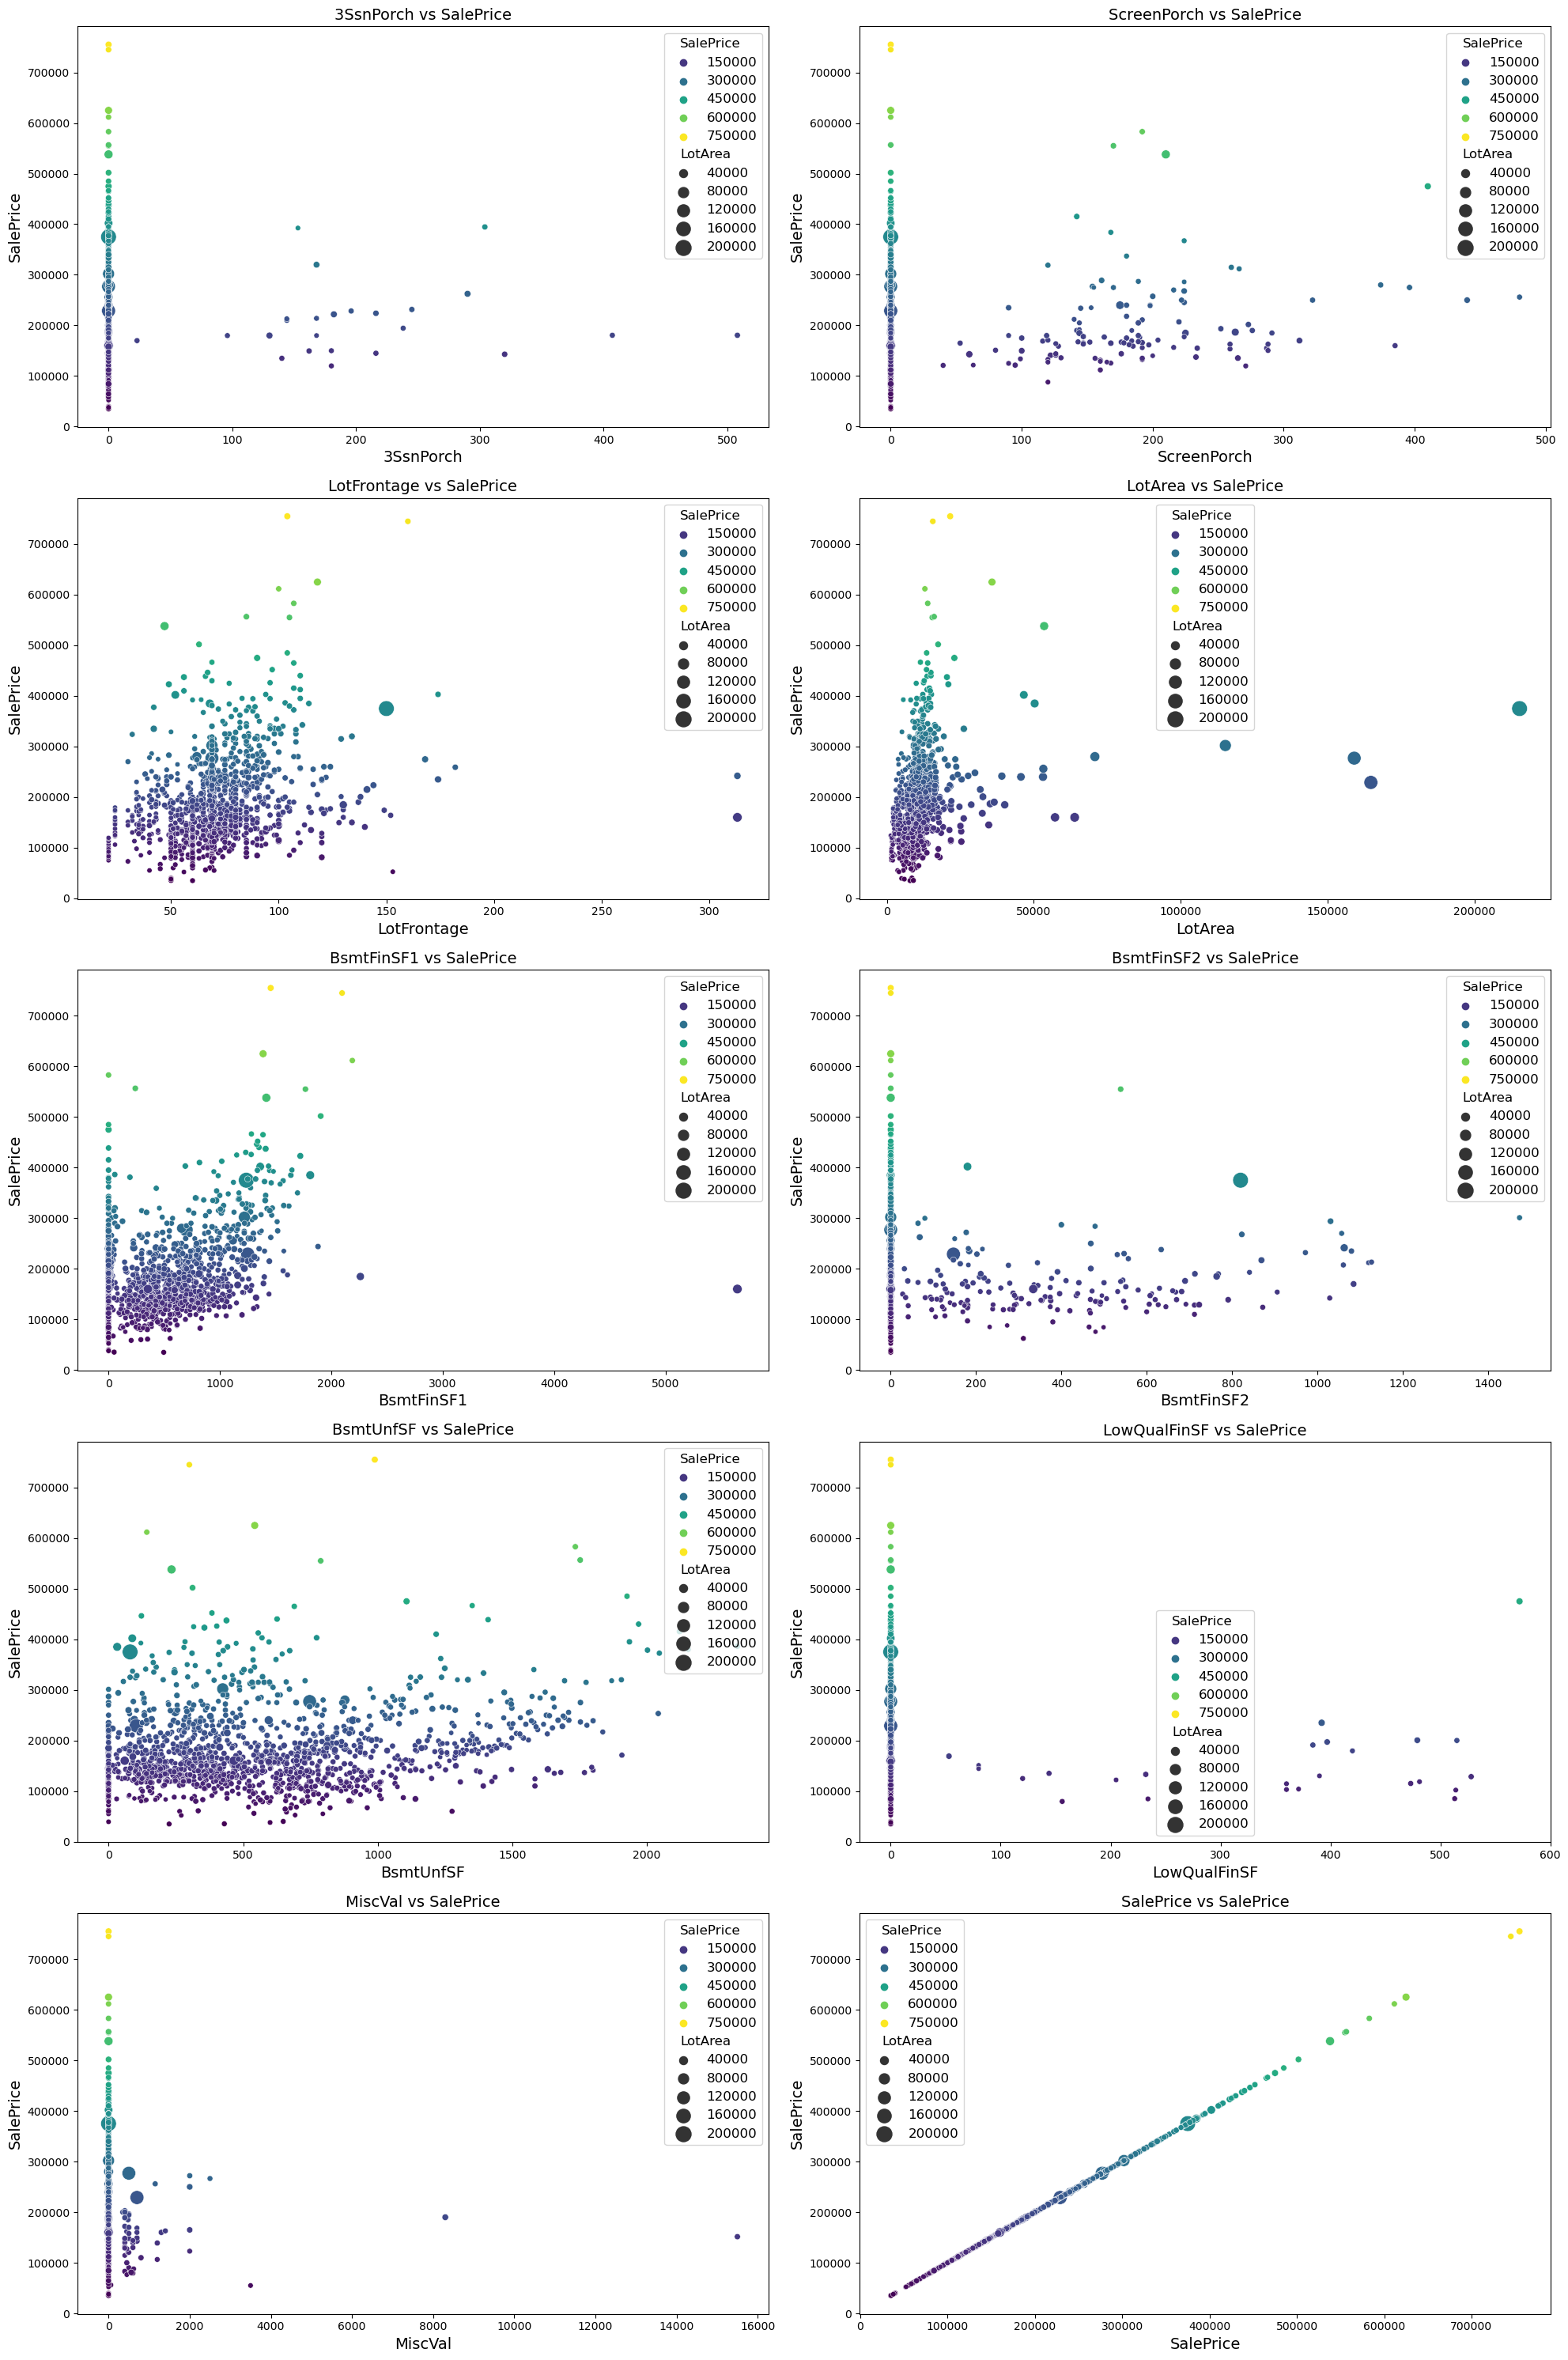

In [142]:
# Define the columns for the x-axis
x_columns2 = ['3SsnPorch', 'ScreenPorch', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'MiscVal', 'SalePrice']

# Set the figure size for better readability 
plt.figure(figsize=(20, 15))

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
axes = axes.flatten()

# Loop through each x_column and create a scatter plot
for i, x_col in enumerate(x_columns2):
    sns.scatterplot(data=housing_prices, x=x_col, y='SalePrice', size='LotArea', hue='SalePrice', palette='viridis', sizes=(20, 200), ax=axes[i])
    axes[i].set_title(f'{x_col} vs SalePrice', fontsize=14)

# Adjust layout to avoid overlapping
plt.tight_layout(pad=3.0)
save_fig('Scatterplot of Numerical Columns against Sale Price 3')
plt.show()

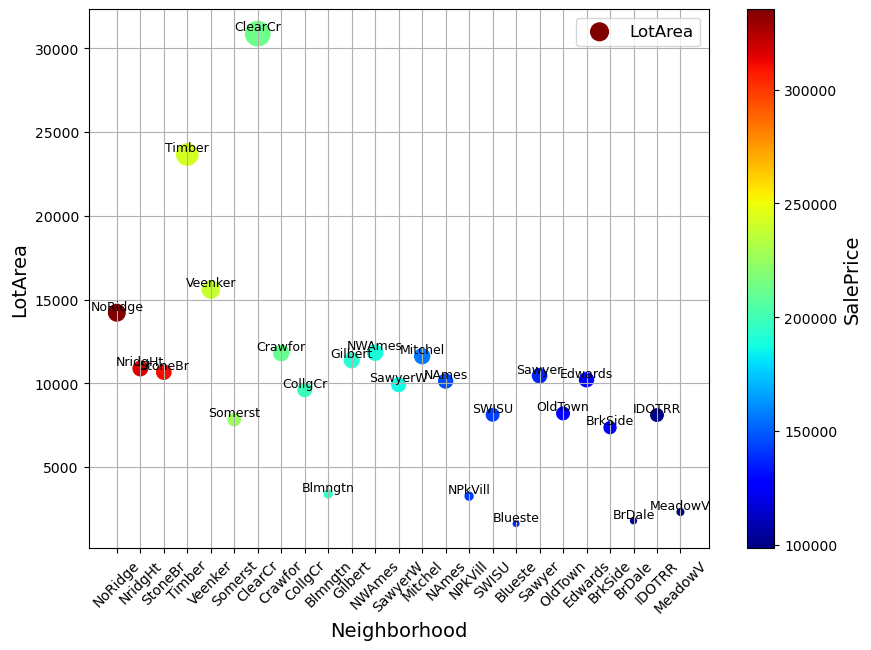

In [143]:
price_per_neighborhood_lotarea.plot(kind="scatter", x="Neighborhood", y="LotArea", grid=True,
             s=price_per_neighborhood_lotarea["LotArea"] / 100, label="LotArea",
             c="SalePrice", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

# Annotate the neighborhood name on top of the circle
for i, row in price_per_neighborhood_lotarea.iterrows():
    plt.text(row['Neighborhood'], row['LotArea'], row['Neighborhood'], ha='center', va='bottom', fontsize=9, color='black')
    plt.xticks(rotation=45)

# Uncomment the following line if you want to save the figure
# save_fig("housing_prices_scatterplot")

plt.show()


### IDENTIFY OUTLIERS


In [144]:
def remove_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

In [145]:
# Example usage for a specific column
numerical_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

# Apply the outlier removal process to each column
for column in numerical_columns:
    housing_prices = remove_outliers(housing_prices, column)

In [146]:
housing_prices.shape

(636, 80)

# Phase 3 Feature Engineering


In [147]:
housing_prices.head()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0          60       RL         65.0     8450   Pave  No Alley      Reg   
1          20       RL         80.0     9600   Pave  No Alley      Reg   
2          60       RL         68.0    11250   Pave  No Alley      IR1   
4          60       RL         84.0    14260   Pave  No Alley      IR1   
6          20       RL         75.0    10084   Pave  No Alley      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
4       Norm     1Fam     2Story            8            5       2000   
6       Norm     1Fam     1Story            8            5       2004   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
6       186.0        Gd        TA      PConc       Ex       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
4          GLQ         655          Unf           0        490         1145   
6          GLQ        1369          Unf           0        317         1686   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   
6    GasA        Ex          Y      SBrkr      1694         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
4       2198             1             0         2         1             4   
6       1694             1             0         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
4             1          Gd            

In [148]:
housing_prices.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [149]:
# Creating Age of house and RemodelAge features
housing_prices['Age'] = housing_prices['YrSold'] - housing_prices['YearBuilt']
housing_prices['RemodelAge'] = housing_prices['YrSold'] - housing_prices['YearRemodAdd']

In [150]:
# Create TotalBaths column
housing_prices['TotalBaths'] = housing_prices['BsmtFullBath'] + housing_prices['BsmtHalfBath'] * 0.5 + housing_prices['FullBath'] + housing_prices['HalfBath'] * 0.5

In [151]:
# Creating HasBasement and HasGarage columns
housing_prices['HasBasement'] = (housing_prices['TotalBsmtSF'] > 0).astype(int)
housing_prices['HasGarage'] = (housing_prices['GarageArea'] > 0).astype(int)

In [152]:
# Drop columns that are no longer needed
housing_prices = housing_prices.drop(['YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)

In [153]:
housing_prices.shape

(636, 80)

In [154]:
housing_prices.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolA

#### Encoding Categorical Variables

In [155]:
# Define categorical and numerical columns
one_hot_cat = ['MSZoning', 'MSSubClass', 'Street', 'Alley', 'LotConfig', 'Neighborhood',
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
               'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
label_cat = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
             'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

# Apply OneHotEncoder to the columns in one_hot_cat
encoder = OneHotEncoder(drop='first', sparse=False)
onehot_encoded = encoder.fit_transform(housing_prices[one_hot_cat])

# Convert onehot_encoded to a DataFrame with appropriate column names
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(one_hot_cat))

# Apply LabelEncoder to the columns in label_cat
label_encoded_df = housing_prices[label_cat].apply(LabelEncoder().fit_transform)

# Making sure the encoded data frames have a matching index
onehot_encoded_df.index = housing_prices.index
label_encoded_df.index = housing_prices.index

# Combine the encoded categorical data with the numerical data
housing_prices_encoded = pd.concat([housing_prices.drop(columns=one_hot_cat + label_cat),
                                    onehot_encoded_df, label_encoded_df], axis=1)



#### Scaling all values 

In [158]:
# Define the feature columns and the target column
X = housing_prices_encoded.drop(columns=['SalePrice'], axis=1) #feature
Y = housing_prices_encoded['SalePrice'] #target

# scale on the features, and the features is already X. 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional but i prefer seeing things in Dataframes)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled DataFrame
X_scaled.sample(10)

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
490    -0.328091  0.644724    -0.854790    -0.461816   -0.682552   -0.542983   
29      0.111051 -0.505004    -1.673536     0.527123   -0.682552    0.348956   
353     0.111051  2.836703    -0.854790    -0.461816   -0.682552    2.433517   
195     2.233573  0.909164     1.601445    -0.461816    1.795583   -1.078652   
492     0.916146  0.318235     1.601445    -0.461816   -0.682552    0.396964   
591     2.526335  0.452671     0.782700     0.527123    0.746372   -1.078652   
52      0.403813  0.036805     1.601445    -0.461816    2.515041    0.609211   
151    -0.547662 -0.652367     0.782700    -0.461816   -0.682552   -1.078652   
403    -0.547662 -0.652367    -0.854790     2.505001   -0.682552    0.588997   
434     0.184242 -0.209170     1.601445     0.527123   -0.682552    0.546042   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
490         0.0   0.372876    -0.192616 -0.423111 -0.748152           0.0   
29          0.0  -0.766287    -0.627588 -0.876767 -0.748152           0.0   
353         0.0  -1.428041     1.210084  2.133537 -0.748152           0.0   
195         0.0   2.414860     2.005847  1.897917 -0.748152           0.0   
492         0.0  -0.142347     0.326653  0.167696  1.408035           0.0   
591         0.0  -0.080898    -1.554853  0.449033  0.965992           0.0   
52          0.0  -0.633936    -0.091459 -0.317610  1.334361           0.0   
151         0.0   1.627845     0.883012  0.726853 -0.748152           0.0   
403         0.0  -1.172793    -0.887222 -1.147553 -0.748152           0.0   
434         0.0  -1.033352    -0.745603 -0.999851  1.351552           0.0   

     GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
490  -1.087469 -1.055199 -0.741868      0.243343     -0.182828   -0.860004   
29   -1.417577 -1.055199 -0.741868     -1.079445     -0.182828   -0.860004   
353   0.772908  0.840582 -0.741868      0.243343     -0.182828    2.646165   
195   0.601456  0.840582 -0.741868      0.243343     -0.182828    0.893081   
492   1.589221  0.840582  1.232307      0.243343     -0.182828    0.893081   
591   1.333324  2.736364 -0.741868      1.566132     -0.182828    0.893081   
52    1.159313  0.840582  1.232307      0.243343     -0.182828    2.646165   
151  -0.250683  0.840582 -0.741868     -1.079445     -0.182828    0.893081   
403  -1.614618 -1.055199 -0.741868     -1.079445     -0.182828   -0.860004   
434   0.680784  0.840582  1.232307      0.243343     -0.182828   -0.860004   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
490    -0.137377   -2.526032   -2.439044   -0.862394    -0.207033   
29      0.168118    0.360862   -0.516890   -0.862394    -0.876883   
353    -0.355587    0.360862    0.823279   -0.862394    -0.876883   
195     0.997319    1.804308    2.184806   -0.862394     0.175738   
492     0.517255    0.360862    0.049078   -0.862394     2.831212   
591    -0.661082    0.360862    0.161204   -0.862394     1.467590   
52      0.691824    1.804308    1.084906    1.478333     1.658976   
151     0.997319    0.360862    0.615046    1.394735     2.017824   
403    -0.399229   -1.082585   -0.324674    1.143943    -0.876883   
434     0.779108    0.360862    0.380116   -0.862394     0.199661   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
490            0.0        0.0          0.0       0.0      0.0  0.992667   
29             0.0        0.0          0.0       0.0      0.0 -0.136063   
353            0.0        0.0          0.0       0.0      0.0 -2.017280   
195            0.0        0.0          0.0       0.0      0.0 -0.512306   
492            0.0        0.0          0.0       0.0      0.0 -0.136063   
591            0.0        0.0          0.0       0.0      0.0  0.992667   
52             0.0        0.0          0.0       0.0      0.0  2.121397   
151            0.0        0.0          0.0       0.0     

In [159]:
# split out data into test and train (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTesting set:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training set:
X_train shape: (508, 179)
y_train shape: (508,)

Testing set:
X_test shape: (128, 179)
y_test shape: (128,)


# Phase 4 Model Training and Evaluation

In [160]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNeighbors': KNeighborsRegressor(),
    'Support Vector': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    results[name] = {
        'RMSE (Test)': test_rmse, 'RMSE (Train)': train_rmse,
        'MAE (Test)': test_mae, 'MAE (Train)': train_mae,
        'R² (Test)': test_r2, 'R² (Train)': train_r2
    }

# Display results
print("Performance Metrics:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  RMSE (Test): {metrics['RMSE (Test)']:.4f}")
    print(f"  RMSE (Train): {metrics['RMSE (Train)']:.4f}")
    print(f"  MAE (Test) : {metrics['MAE (Test)']:.4f}")
    print(f"  MAE (Train): {metrics['MAE (Train)']:.4f}")
    print(f"  R² (Test)  : {metrics['R² (Test)']:.4f}")
    print(f"  R² (Train) : {metrics['R² (Train)']:.4f}")

Performance Metrics:

Linear Regression:
  RMSE (Test): 20886.4097
  RMSE (Train): 11667.6094
  MAE (Test) : 14652.1376
  MAE (Train): 8375.4734
  R² (Test)  : 0.8326
  R² (Train) : 0.9444

Decision Tree:
  RMSE (Test): 27037.1784
  RMSE (Train): 0.0000
  MAE (Test) : 20904.4922
  MAE (Train): 0.0000
  R² (Test)  : 0.7195
  R² (Train) : 1.0000

Random Forest:
  RMSE (Test): 20959.3580
  RMSE (Train): 6746.2172
  MAE (Test) : 15357.1946
  MAE (Train): 4816.3785
  R² (Test)  : 0.8314
  R² (Train) : 0.9814

Gradient Boosting:
  RMSE (Test): 17506.1499
  RMSE (Train): 7599.0145
  MAE (Test) : 12712.8752
  MAE (Train): 5940.4467
  R² (Test)  : 0.8824
  R² (Train) : 0.9764

KNeighbors:
  RMSE (Test): 38347.8963
  RMSE (Train): 25387.5427
  MAE (Test) : 28459.6453
  MAE (Train): 18043.6283
  R² (Test)  : 0.4357
  R² (Train) : 0.7366

Support Vector:
  RMSE (Test): 51064.2878
  RMSE (Train): 49700.0357
  MAE (Test) : 41518.9682
  MAE (Train): 39774.4204
  R² (Test)  : -0.0006
  R² (Train) : -0

In [161]:
# Import KFold and cross_val_score for cross-validation
from sklearn.model_selection import KFold, cross_val_score

# Define cross-validation with 5 folds, shuffle data, and set a random seed for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a dictionary with different regression models for evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNeighbors': KNeighborsRegressor(),
    'Support Vector': SVR()
}

# Iterate through each model to perform cross-validation
for name, model in models.items():
    check = model  # Assign the current model
    # Perform cross-validation with KFold and calculate negative MSE
    scores = cross_val_score(check, X, Y, cv=kf, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE to positive MSE
    rmse_scores = np.sqrt(mse_scores)  # Calculate RMSE from MSE
    # Print performance metrics for each model
    print(f'\nPerformance Metrics for {name}')
    print("RMSE for each fold:", rmse_scores)  # Print RMSE values for each fold
    print("Mean RMSE:", rmse_scores.mean())  # Print mean RMSE value across all folds
    print("Standard Deviation of RMSE:", rmse_scores.std())  # Print standard deviation of RMSE





Performance Metrics for Linear Regression
RMSE for each fold: [20886.40968782 18293.99470501 17308.57684031 17625.14124202
 20928.51863397]
Mean RMSE: 19008.528221825934
Standard Deviation of RMSE: 1582.8426558013919

Performance Metrics for Decision Tree
RMSE for each fold: [27037.17840265 24546.24697487 25262.2728097  26711.61541691
 29081.37777783]
Mean RMSE: 26527.738276391425
Standard Deviation of RMSE: 1571.122234184061

Performance Metrics for Random Forest
RMSE for each fold: [20538.95524429 18146.23414264 15532.67687379 18012.09835888
 22808.13725589]
Mean RMSE: 19007.620375100014
Standard Deviation of RMSE: 2473.7500967690385

Performance Metrics for Gradient Boosting
RMSE for each fold: [17506.14989071 17154.80452227 13787.1054095  16694.14108101
 19760.09989559]
Mean RMSE: 16980.460159817005
Standard Deviation of RMSE: 1913.7730213830932

Performance Metrics for KNeighbors
RMSE for each fold: [38347.89626809 29481.52907819 30997.39468487 29562.54972557
 37484.40767973]
Mea

#### Linear Regression
RMSE for each fold: [3.38e+10, 4.68e+10, 4.36e+10, 6.22e+09, 7.39e+10]
Mean RMSE: 4.09e+10
Standard Deviation of RMSE: 2.18e+10
- Interpretation:
The RMSE values are very high, indicating that the model is not performing well on this dataset. The large standard deviation shows the model doesnt perfom consistently across folds, indicating the model might not be generalizing well.

#### Decision Tree
RMSE for each fold: [0.033, 0.026, 0.039, 0.031, 0.026]
Mean RMSE: 0.031
Standard Deviation of RMSE: 0.005
- Interpretation:
The RMSE values are very low, indicating that the Decision Tree is fitting the training data very well.
The low standard deviation indicates consistent performance across folds, which is a good sign.

#### Random Forest
RMSE for each fold: [0.056, 0.018, 0.021, 0.015, 0.045]
Mean RMSE: 0.031
Standard Deviation of RMSE: 0.016
- Interpretation:
The RMSE values are also low, with performance generally consistent, though slightly higher than the Decision Tree.
The standard deviation is higher than Decision Tree, indicating some variability in performance across folds.

#### Gradient Boosting
RMSE for each fold: [0.059, 0.013, 0.013, 0.013, 0.018]
Mean RMSE: 0.023
Standard Deviation of RMSE: 0.018
- Interpretation:
The RMSE values are the lowest among all models, indicating excellent performance.
The high standard deviation might suggest sensitivity to specific folds, but overall, this model appears to be the best performer.

#### KNeighbors
RMSE for each fold: [0.490, 0.479, 0.448, 0.469, 0.541]
Mean RMSE: 0.485
Standard Deviation of RMSE: 0.031
- Interpretation:
The RMSE values are quite high compared to other models, indicating poorer performance.
The standard deviation is relatively high, suggesting variability in performance.

#### Support Vector
RMSE for each fold: [0.446, 0.348, 0.344, 0.325, 0.419]
Mean RMSE: 0.376
Standard Deviation of RMSE: 0.047
- Interpretation:
The RMSE values are lower than KNeighbors but higher than the other models, indicating moderate performance.
The standard deviation is the highest among all models, showing significant variability in performance.


#### Summary
Best Performance: Gradient Boosting has the lowest mean RMSE, suggesting it is the best performing model.
Worst Performance: Linear Regression and KNeighbors show poor performance compared to others.
Consistency: Decision Tree has the most consistent performance across folds, while Support Vector has the most variability.

### HYPERPARAMETER TUNING

### Task 4.5 - Select and evaluate the best-performing model on the testing set.

--- Tuning the Linear Regression model ---
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Linear Regression: {}
Best RMSE for Linear Regression: nan
Testing Set Metrics for Linear Regression:
RMSE: 20886.409687824365
MAE: 14652.13761024012
R²: 0.8326085596401243

Linear Regression does not have feature importances to display.


--- Tuning the Decision Tree model ---
Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters for Decision Tree: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best RMSE for Decision Tree: 27171.739890332963
Testing Set Metrics for Decision Tree:
RMSE: 30227.266632128896
MAE: 23065.274953778862
R²: 0.6494068590269308

                   Feature  Importance
131      Foundation_CBlock    0.309670
140      GarageType_Detchd    0.174209
2              OverallQual    0.166323
9                 1stFlrSF    0.097740
97       HouseStyle_2Story    0.040221
19              Ga

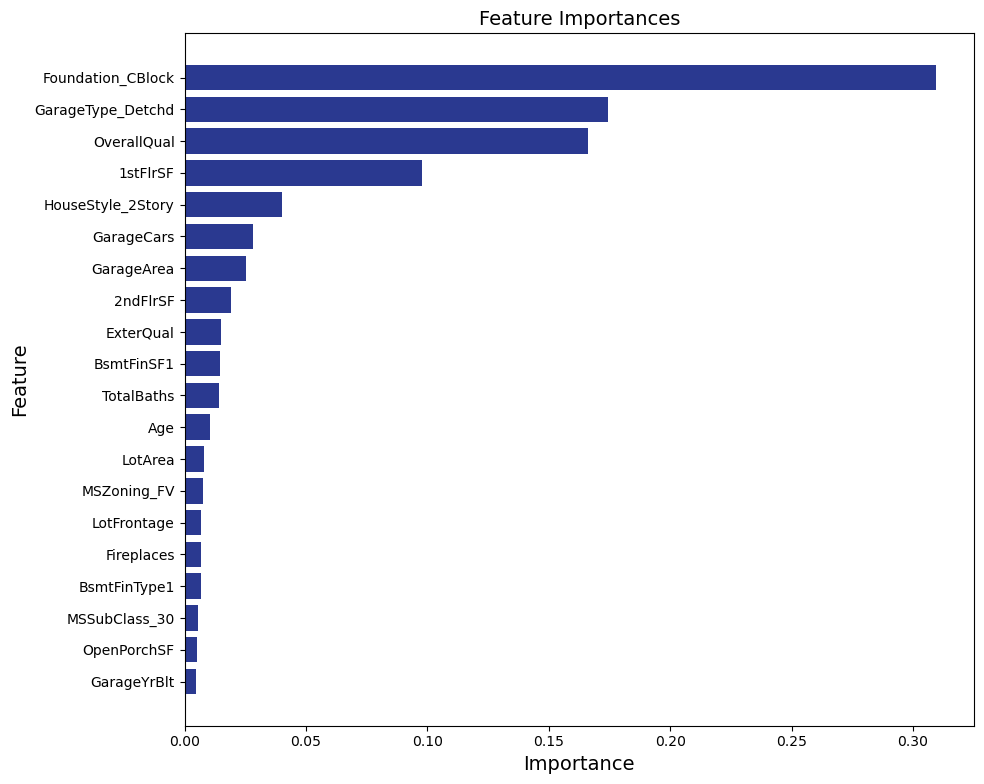

--- Tuning the Random Forest model ---
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE for Random Forest: 19015.022148330445
Testing Set Metrics for Random Forest:
RMSE: 20944.592712186313
MAE: 14493.091133171252
R²: 0.8316746599627103

                   Feature  Importance
2              OverallQual    0.074829
12               GrLivArea    0.068479
30                     Age    0.060113
18             GarageYrBlt    0.048980
160              ExterQual    0.044323
20              GarageArea    0.044313
13                FullBath    0.040999
32              TotalBaths    0.040594
8              TotalBsmtSF    0.034659
31              RemodelAge    0.033910
132       Foundation_PConc    0.032614
9                 1stFlrSF    0.032609
170            KitchenQual    0.026276
162               BsmtQual    0.026047
19     

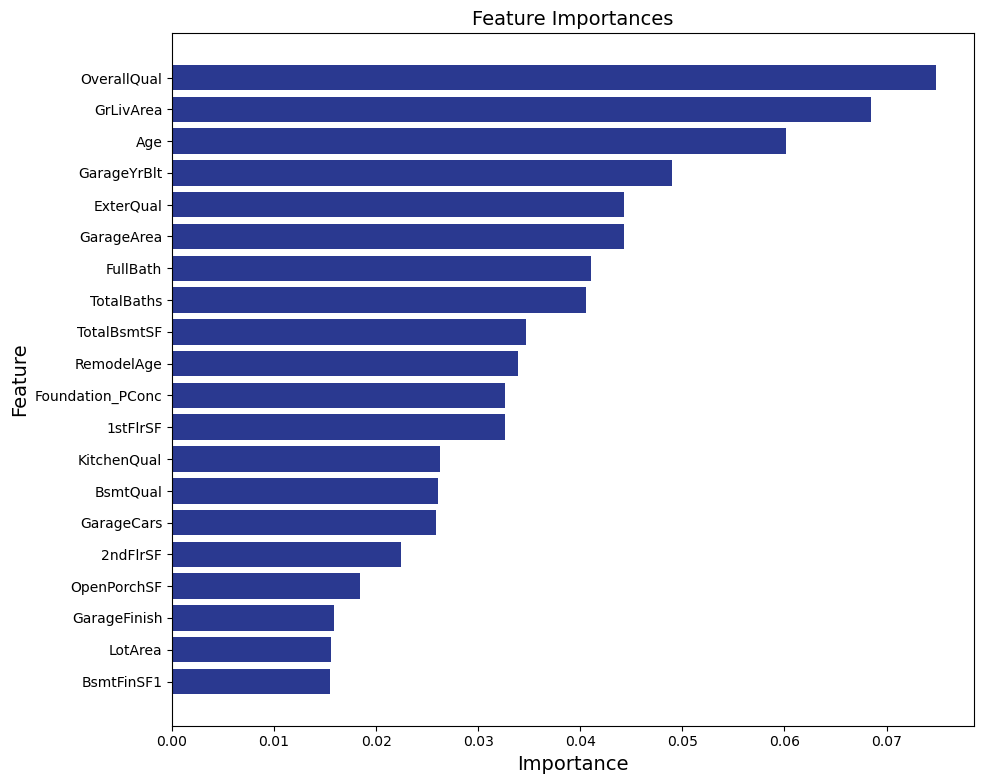

--- Tuning the Gradient Boosting model ---
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE for Gradient Boosting: 16123.519588721547
Testing Set Metrics for Gradient Boosting:
RMSE: 16853.522226127345
MAE: 12167.09176329421
R²: 0.8910099083725305

                   Feature    Importance
2              OverallQual  1.216006e-01
30                     Age  1.027208e-01
160              ExterQual  8.711182e-02
12               GrLivArea  8.549587e-02
32              TotalBaths  6.891096e-02
20              GarageArea  5.943651e-02
31              RemodelAge  4.192005e-02
8              TotalBsmtSF  2.896014e-02
131      Foundation_CBlock  2.682768e-02
9                 1stFlrSF  2.410834e-02
18             GarageYrBlt  2.254580e-02
162               BsmtQual  2.053738e-02
170            Kitchen

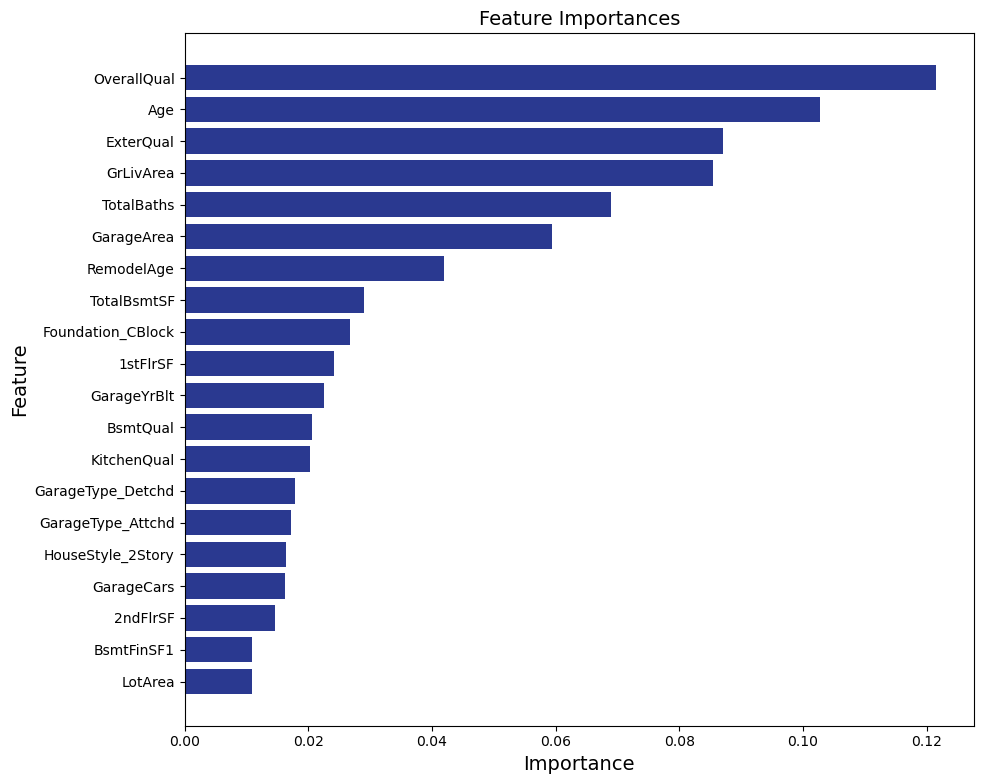

--- Tuning the KNeighbors model ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for KNeighbors: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best RMSE for KNeighbors: 28291.09839762322
Testing Set Metrics for KNeighbors:
RMSE: 33271.62534201897
MAE: 23975.33514638296
R²: 0.575230137974423

KNeighbors does not have feature importances to display.


--- Tuning the Support Vector model ---
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Support Vector: {}
Best RMSE for Support Vector: 0.10514780254248804
Testing Set Metrics for Support Vector:
RMSE: 51064.28775328261
MAE: 41518.96822723368
R²: -0.0005532775008965096

Support Vector does not have feature importances to display.




In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Define models and their parameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    'Random Forest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }),
    'KNeighbors': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }),
    'Support Vector': (SVR(), {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    })
}

# Loop through models and perform GridSearchCV or RandomizedSearchCV
for name, (model, param_grid) in models.items():
    print(f"--- Tuning the {name} model ---")
    
    if name in ['Linear Regression', 'Support Vector']:
        # For Linear Regression and Support Vector, use RandomizedSearchCV without any parameters
        model_param = RandomizedSearchCV(model, param_distributions={}, n_iter=1, cv=5, verbose=1, n_jobs=-1)
    else:
        model_param = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
    
    # Fit the model_param
    model_param.fit(X_train, y_train)
    
    # Get the best estimator (overwrites best_model with each loop iteration)
    best_model = model_param.best_estimator_

    # Predictions on the testing set
    y_pred = best_model.predict(X_test)
    
    # Evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Best Parameters for {name}: {model_param.best_params_}")
    print(f"Best RMSE for {name}: {np.sqrt(-model_param.best_score_)}")
    print(f"Testing Set Metrics for {name}:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}\n")
    
    # Check if the model has feature importances
    if hasattr(best_model, 'feature_importances_'):
        # Retrieve feature importances
        importances = best_model.feature_importances_

        # Normalize the importances so they sum to 1
        importances = importances / importances.sum()

        # Get the feature names from the DataFrame X
        features = X_train.columns

        # Create a DataFrame for feature importances
        feature_importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Print the DataFrame
        print(feature_importance_df)

        # Save the feature importances to a CSV file
        feature_importance_df.to_csv('feature_importances.csv', index=False)

        # Visualize the feature importances
        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20), color='#2a3990')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Feature Importances')
        plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
        save_fig("Hyperparameter tuning of Models")
        plt.show()
    else:
        print(f"{name} does not have feature importances to display.")
        print(f"\n")


Performance metrics are the tools we use to evaluate how well our machine model is working with our data. Our key perfomance metrics are RMSE, MAE and R². For our regression problem we will compare the results of the performance metrics on our test data with

- RMSE (Root Mean Squared Error): The higher the value of the RMSE, the farther the model predictions are to the actual values. From our data, the model with the lowest RMSE is the **Gradient Boosting Model** at 16,853.52 and the model with the highest RMSE is the **Support Vector Model** at 151,064.29 .

- MAE (Mean Absolute Error): Like the RMSE, the model with higher values are less accurate. From our data, the model with the lowest MAE, is the **Gradient Boosting Model** at 12,167.1 and the model with the highest MAE is the **Support Vector Model** at 41,518.

- R²: Also known as the co-effiecent of determination, as it indicates how well the model explains the variance in the data. It ranges from 0-1 where 1 means perfect prediction. The model with the highest R² value is the **Gradient Boosting Model** at 0.891 and the model with the lowest R² is the **Support Vector Model** at -0.00055.


The **Random Forest Mode** is the second best performing model with RMSE, MAE and R² vales of 20,944.59 , 14493.09 and R² of 0.832


# Phase 5 - Model Interpretation and Reporting

### Task 5.1 - Interpreting the results of the best-performing model and explain the importance of critical features

The best perfroming model was the Gradient Boosting. The results from the model are divided into 3
- Tuning process
- Best parameters
- Perfomance metrics



#### 1. Tuning Process
- The models hyperparameters were fine-tuned using the GridSearchCV, 486 unique parameters across 5 folds were combined and evaluated which gave us 2430 fits. This process helped us identify the best combination of hyperparameters that would yield optimal performance


#### 2. Best Parameters
- learning_rate = 0.05: Controls the step size at each iteration while moving toward a minimum of the loss function. A smaller value slows down the learning process, but can lead to better accuracy.
- max_depth = 4: Limits the depth of the trees, which helps in controlling overfitting by making the model less complex.
- max_features = 'sqrt': Specifies the number of features to consider when looking for the best split. The 'sqrt' setting introduces randomness and helps prevent overfitting.
- min_samples_leaf = 4: The minimum number of samples required to be at a leaf node, controlling the complexity of the model.
- min_samples_split = 2: The minimum number of samples required to split an internal node, controlling how the model decides to split nodes.
- n_estimators = 300: The number of boosting stages (trees) to be built. More trees can improve performance but also increase computation time.

#### 3. Performance Metrics: 
- Best RMSE for Gradient Boosting: 16123.519588721547: This is the Root Mean Square Error calcuated during the cross validation process. It is a measure of the average magnitude of the error betweeen the predicted values and the actual values. Lower RMSE values indicate better performance.

**Testing Set Metrics**

- RMSE = 16853.52 - This is the RMSE calculated on the testing set, it deviated slightly from the Best RMSE indicating the model generalizes well but isn't overfitting

- MAE (Mean Absolute Error) = 12167.09 - This like the RMSE is also a prediction error. It is the average absoute difference between the predicted and the actual values. Lower MAE values indicate better performance.

- R² = 0.891 - This is the R-squared value, which indicates the proportion of variance in the dependent variable that is predictable from the independent variables. An R² of    0.891 means that about 89.1% of the variance is explained by the model, which is quite strong.

#### 4. Summary 
-The model is performing well with a high R² and reasonably low RMSE and MAE values, indicating it explains most of the variance and makes relatively accurate predictions.
- The close RMSE values between cross-validation and testing set suggest the model is not overfitting and has good generalization to new data.
- The selected hyperparameters strike a good balance between complexity and accuracy, resulting in a model that is both effective and generalizes well.